In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

D:\WorkSoftWare\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

In [5]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

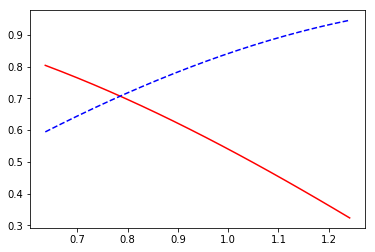

[array([[[ 0.59448077],
         [ 0.61977092],
         [ 0.64443316],
         [ 0.6684425 ],
         [ 0.69177464],
         [ 0.71440591],
         [ 0.73631341],
         [ 0.75747492],
         [ 0.77786902],
         [ 0.79747503],
         [ 0.81627311],
         [ 0.8342442 ],
         [ 0.85137009],
         [ 0.86763343],
         [ 0.88301776],
         [ 0.89750747],
         [ 0.9110879 ],
         [ 0.92374528],
         [ 0.93546679],
         [ 0.94624055]],
 
        [[ 0.95605566],
         [ 0.96490215],
         [ 0.97277108],
         [ 0.97965447],
         [ 0.98554535],
         [ 0.99043774],
         [ 0.9943267 ],
         [ 0.99720828],
         [ 0.99907956],
         [ 0.99993864],
         [ 0.99978466],
         [ 0.99861778],
         [ 0.99643916],
         [ 0.99325103],
         [ 0.98905661],
         [ 0.98386015],
         [ 0.97766692],
         [ 0.97048318],
         [ 0.96231623],
         [ 0.95317432]],
 
        [[ 0.94306673],
         [

In [6]:
%matplotlib inline
get_batch()

In [7]:
model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
))
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

D:\WorkSoftWare\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  import sys


Training ------------


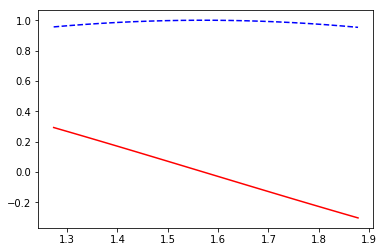

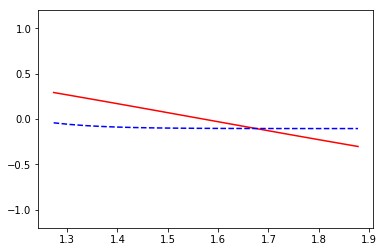

train cost:  0.4972093


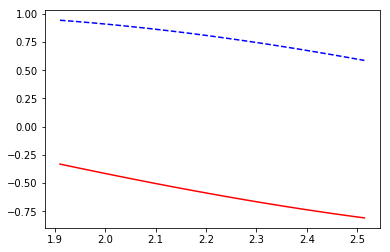

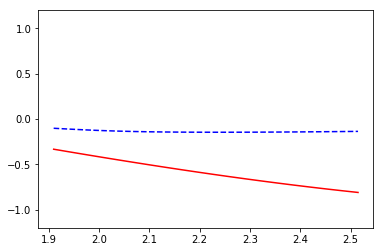

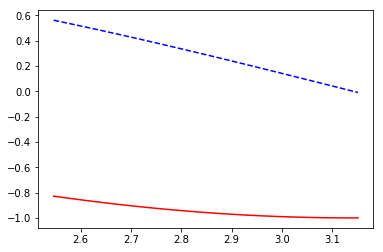

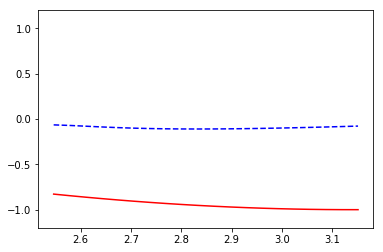

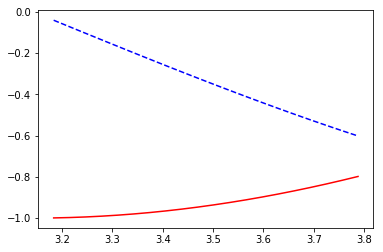

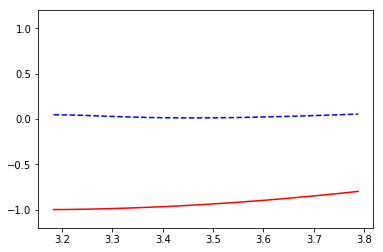

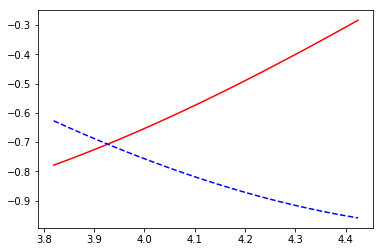

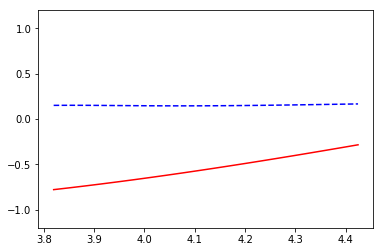

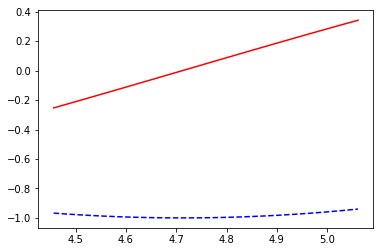

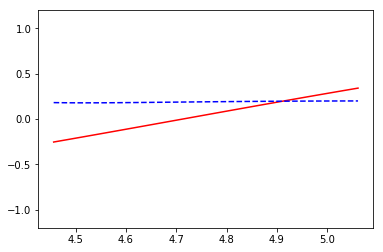

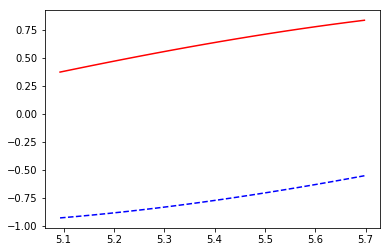

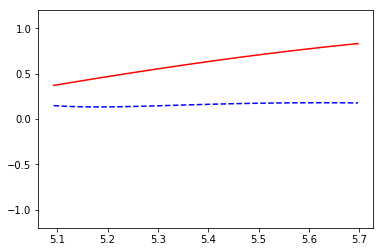

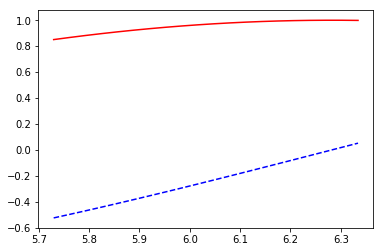

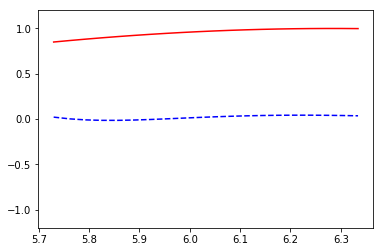

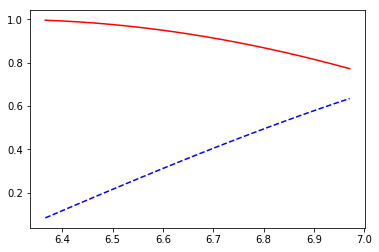

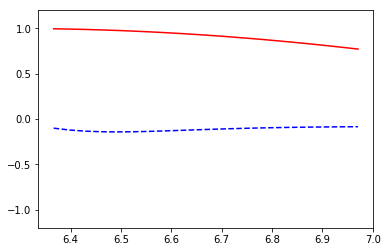

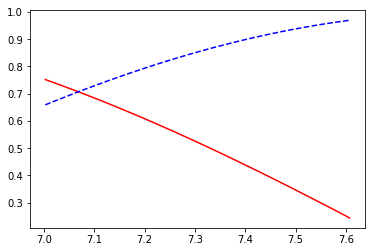

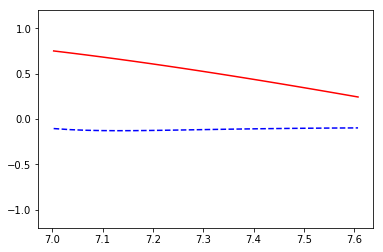

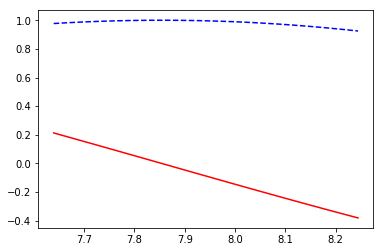

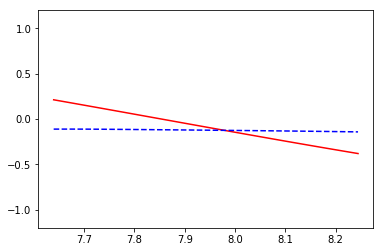

train cost:  0.35869712


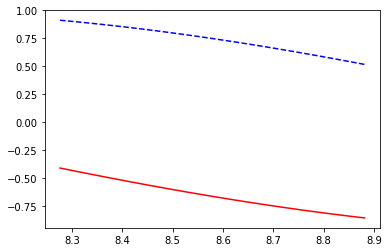

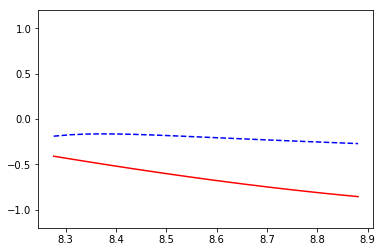

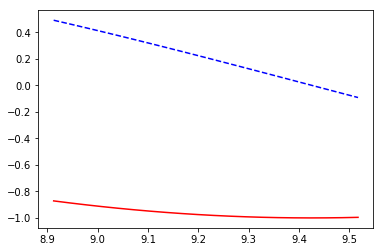

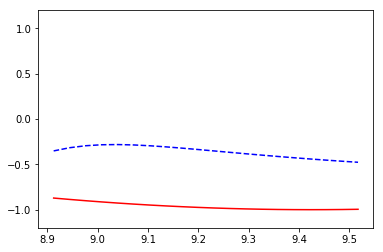

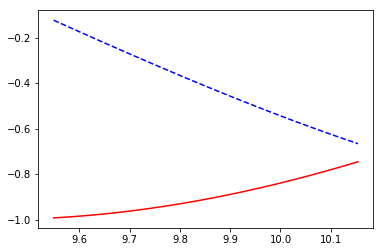

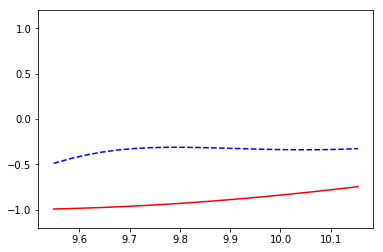

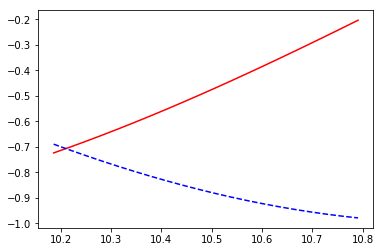

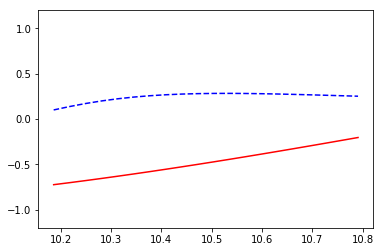

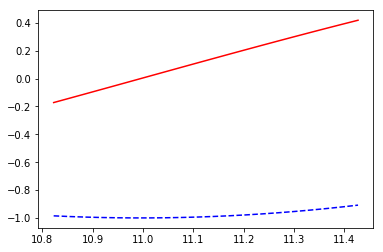

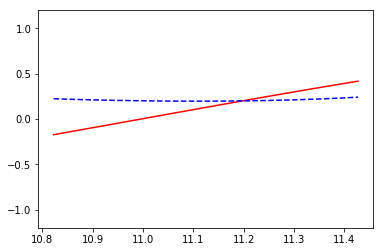

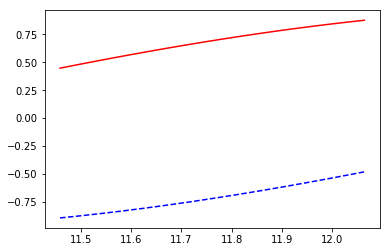

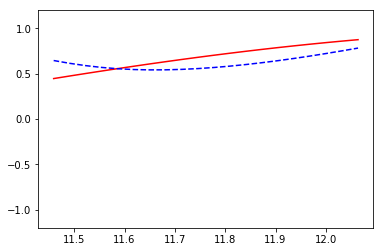

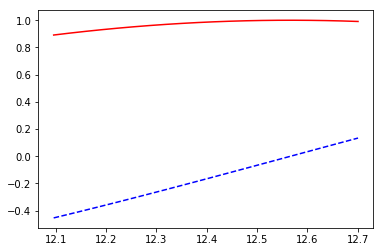

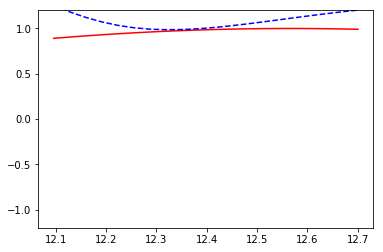

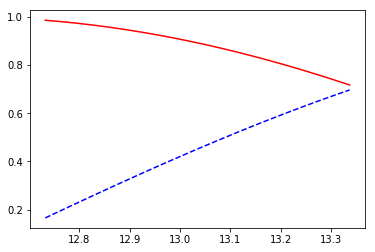

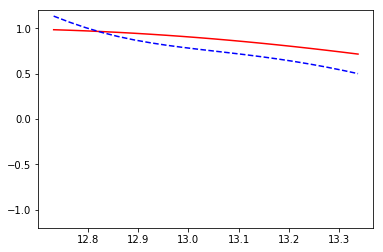

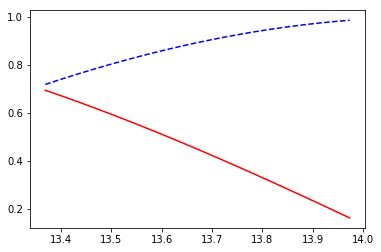

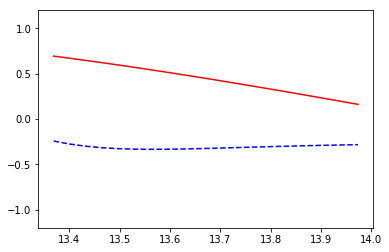

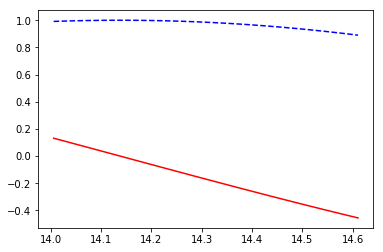

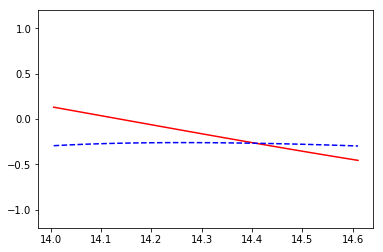

train cost:  0.07077887


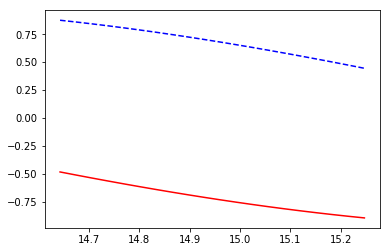

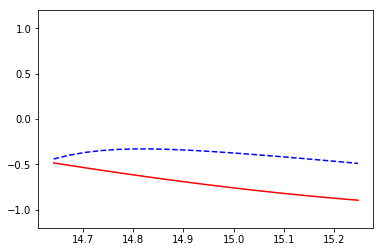

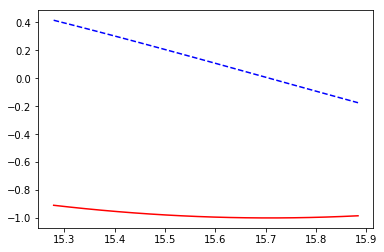

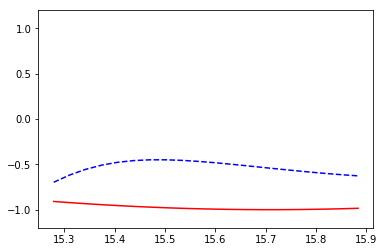

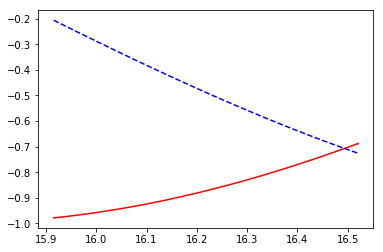

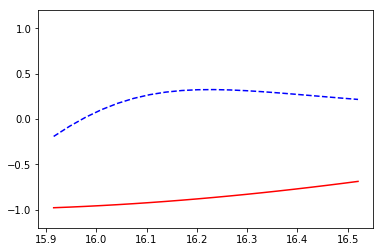

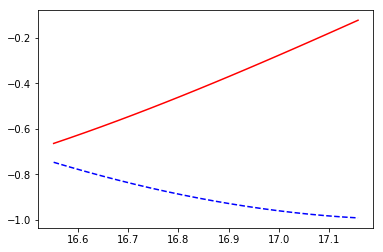

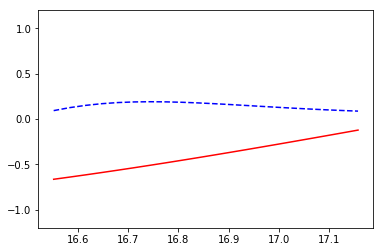

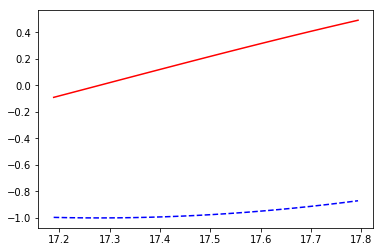

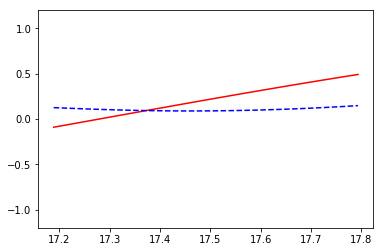

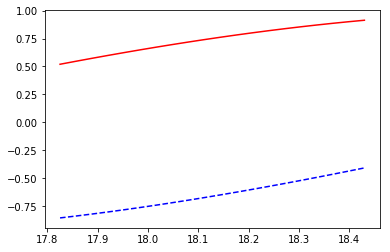

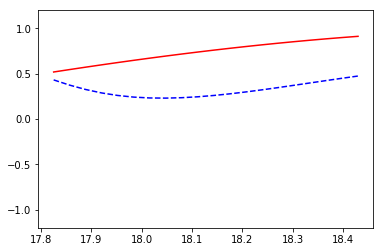

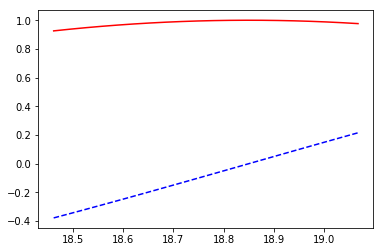

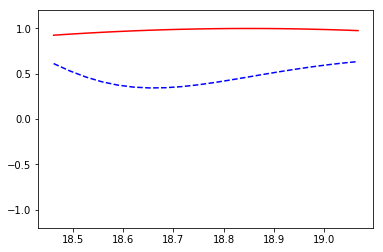

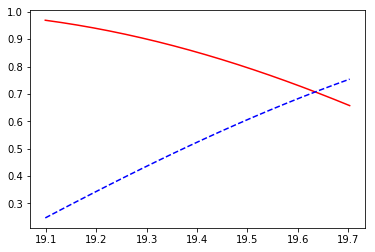

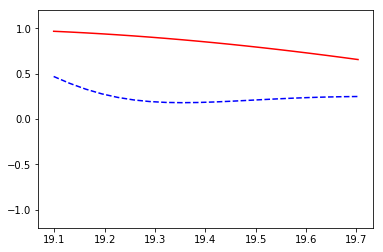

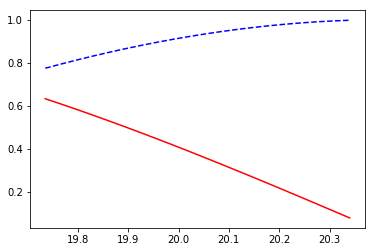

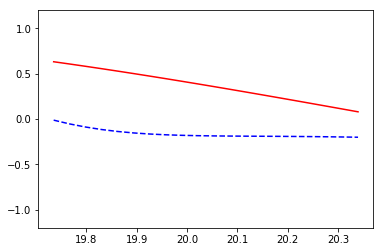

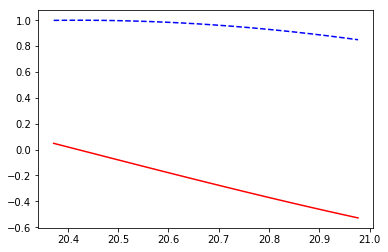

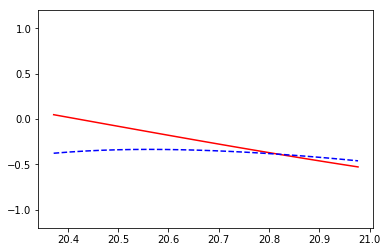

train cost:  0.10573724


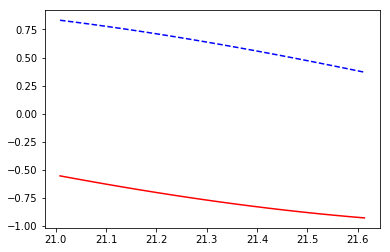

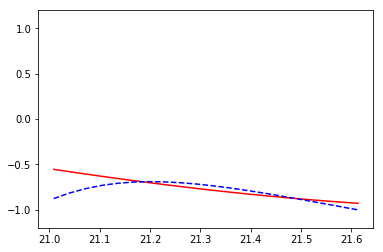

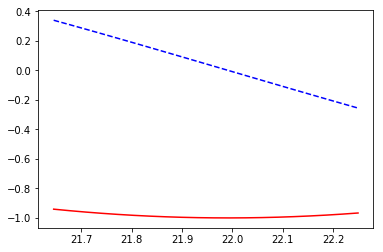

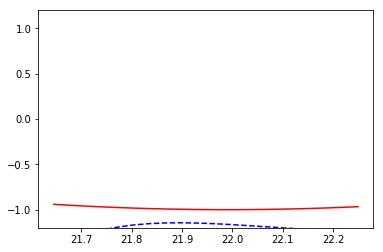

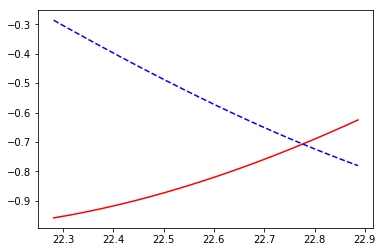

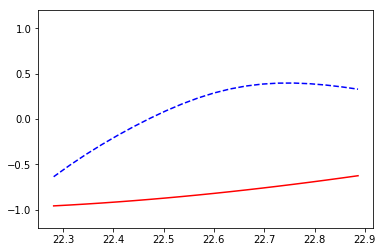

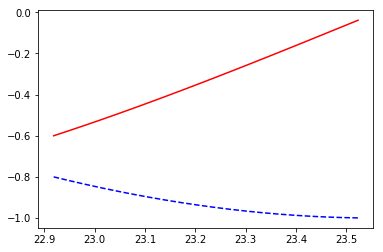

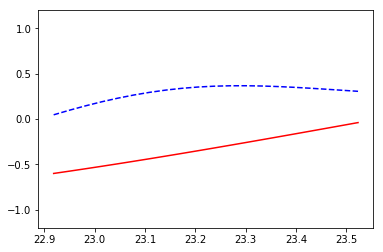

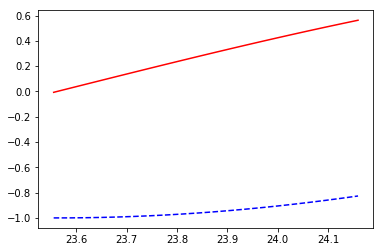

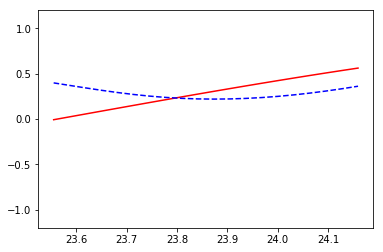

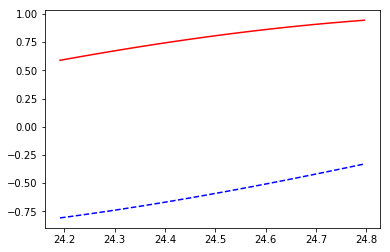

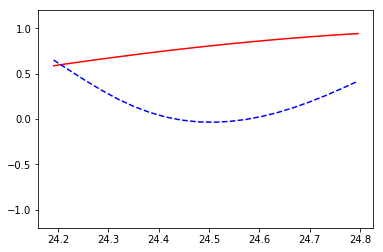

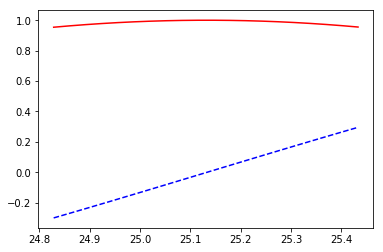

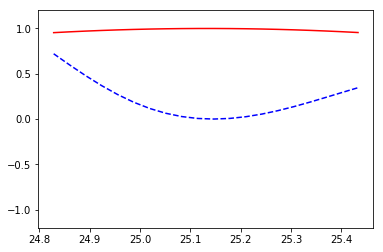

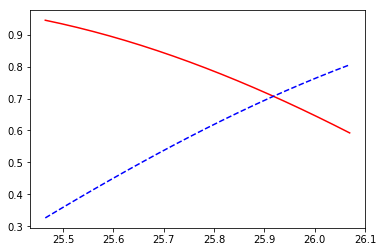

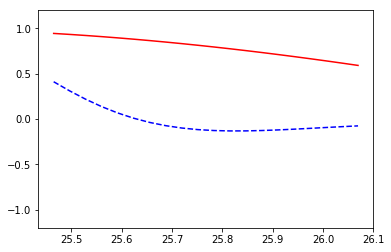

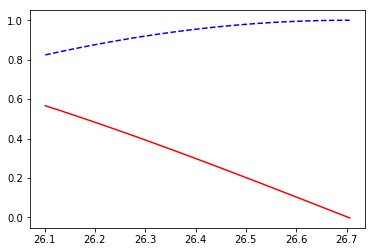

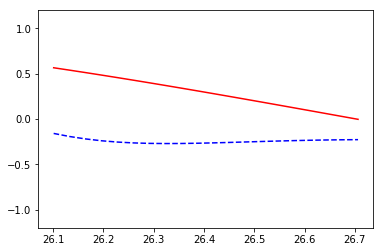

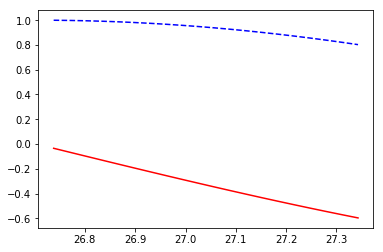

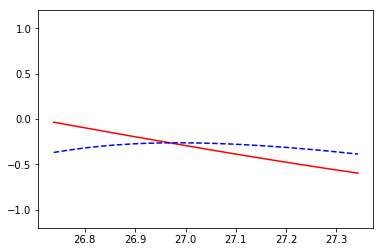

train cost:  0.11675927


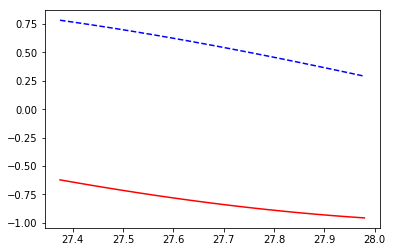

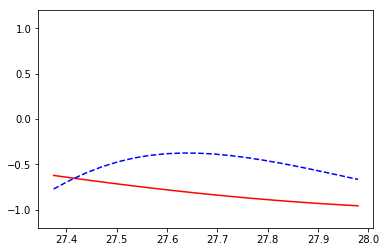

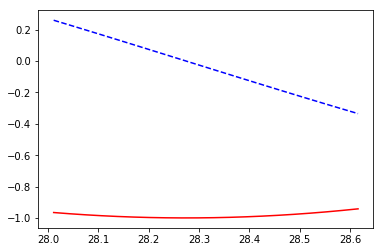

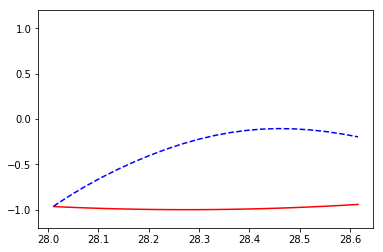

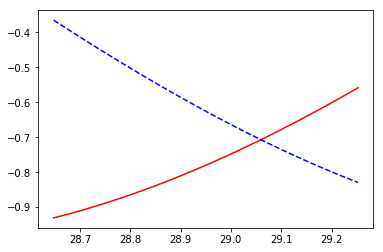

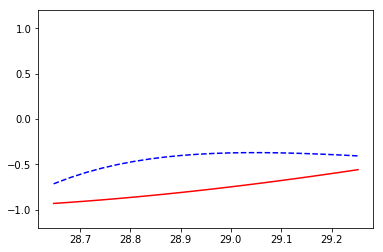

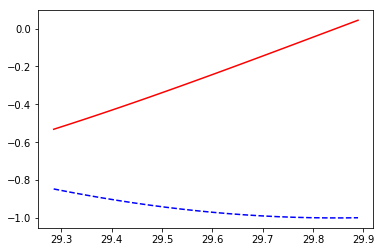

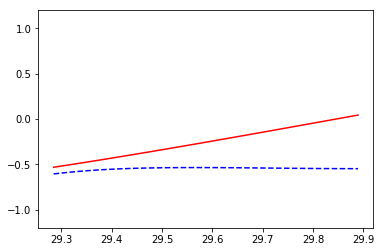

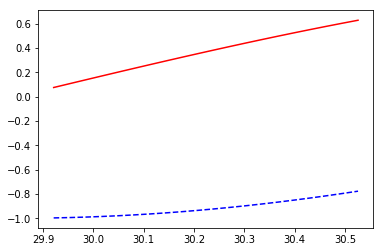

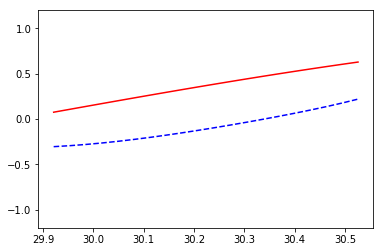

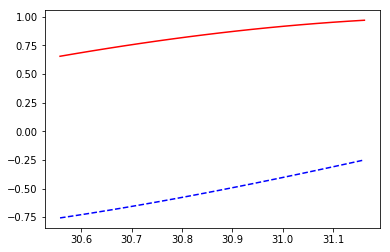

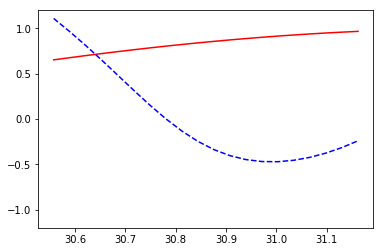

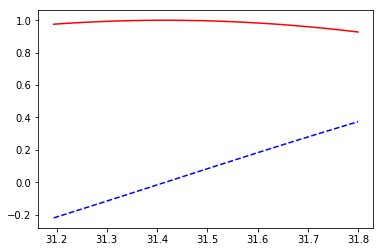

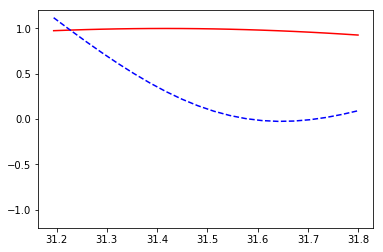

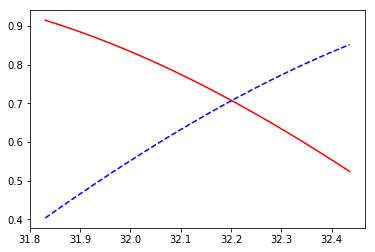

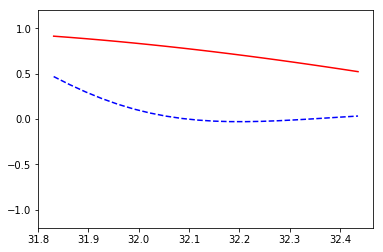

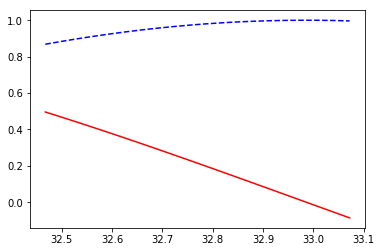

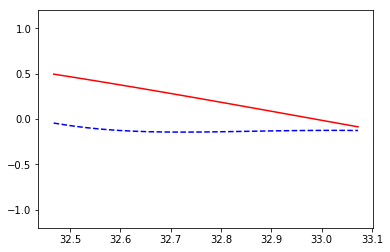

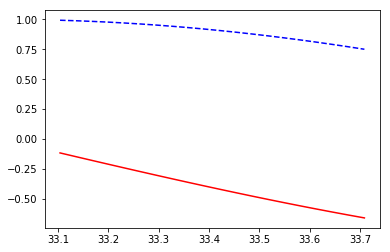

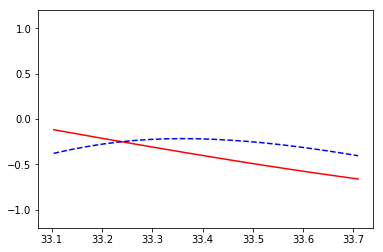

train cost:  0.086027935


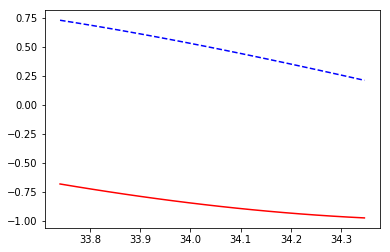

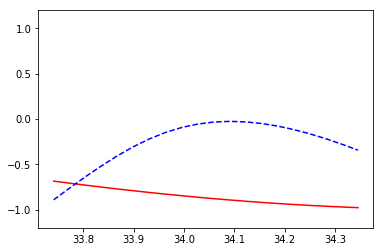

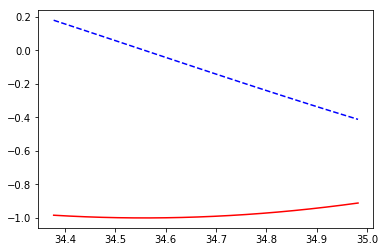

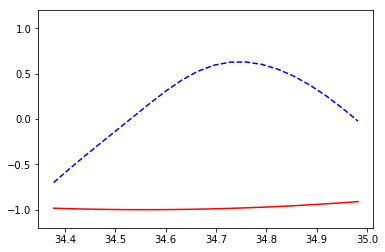

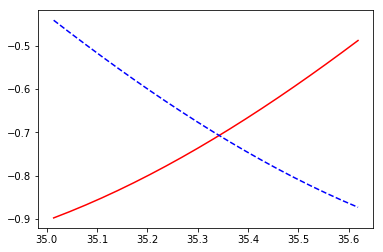

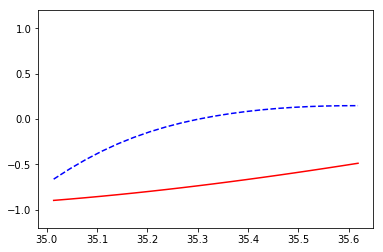

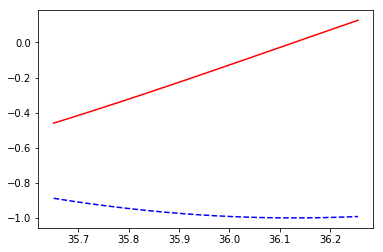

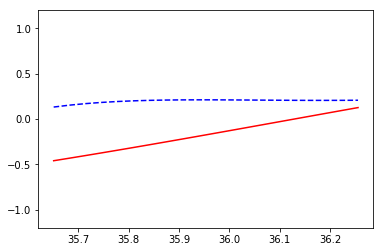

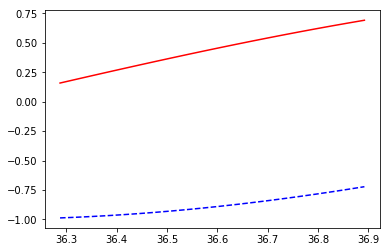

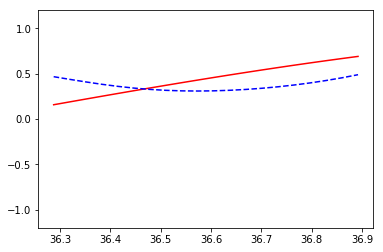

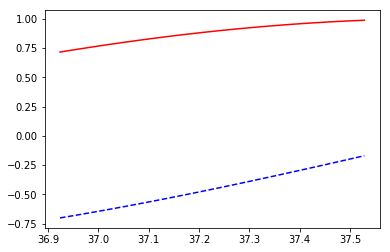

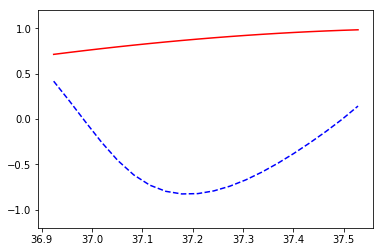

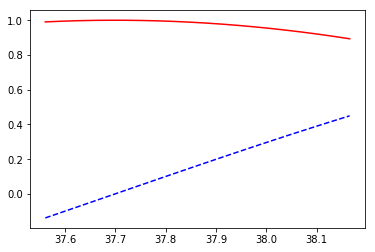

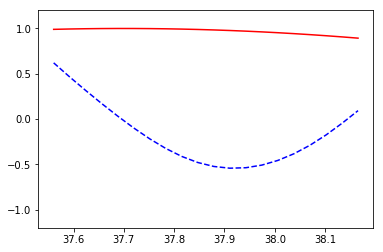

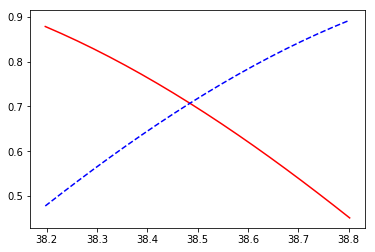

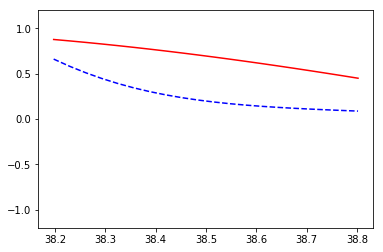

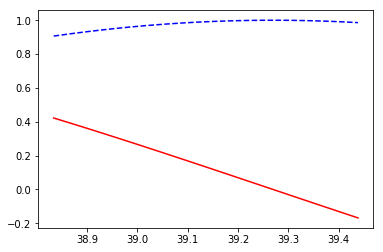

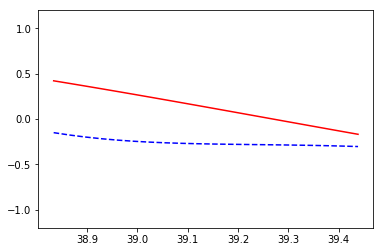

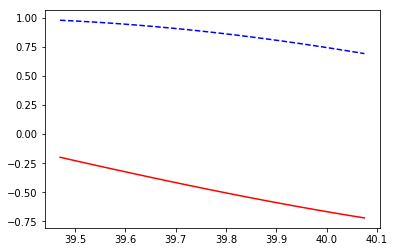

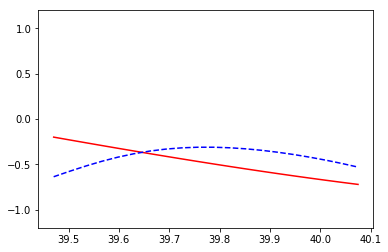

train cost:  0.06415151


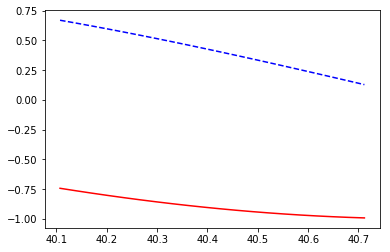

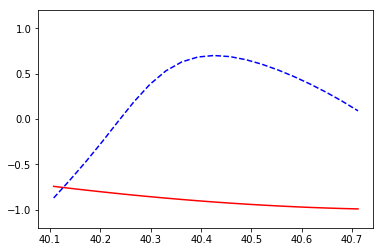

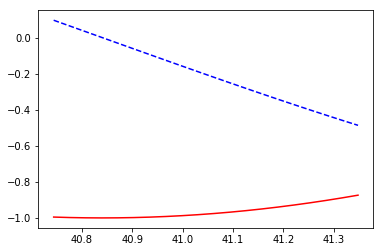

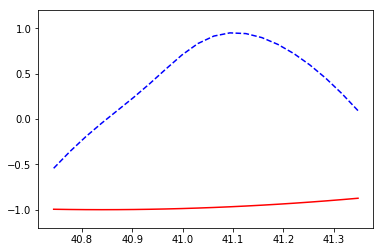

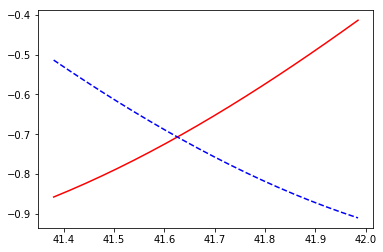

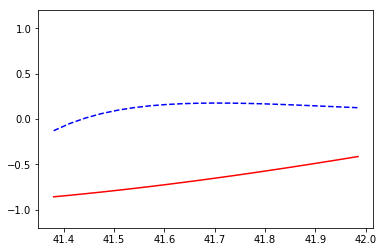

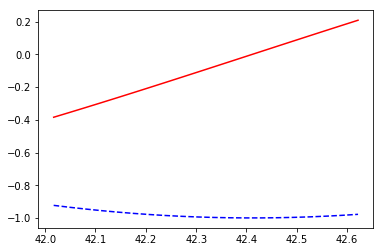

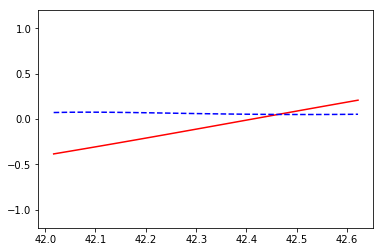

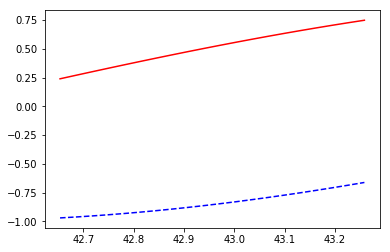

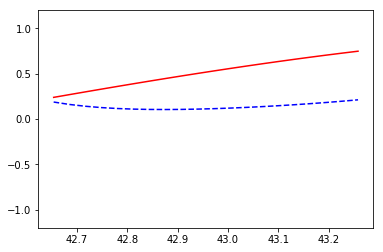

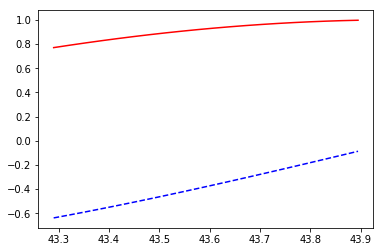

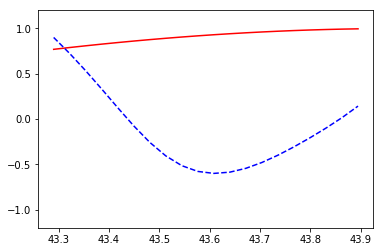

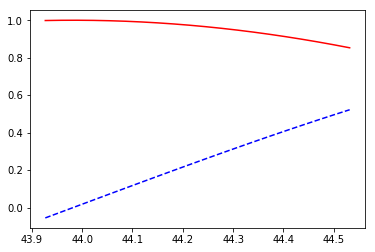

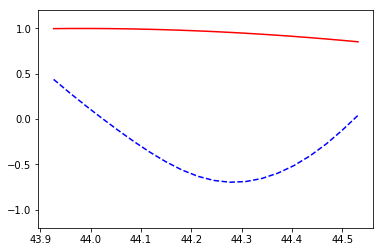

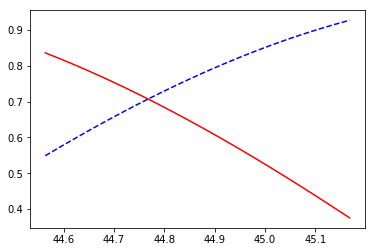

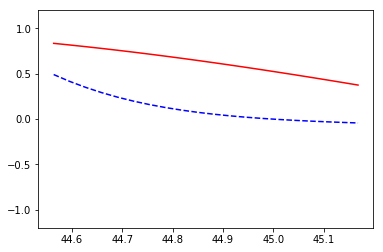

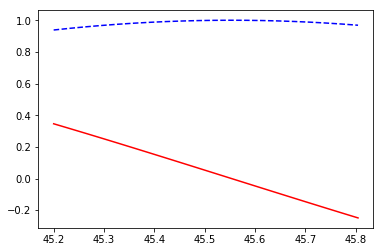

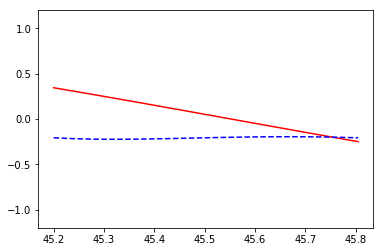

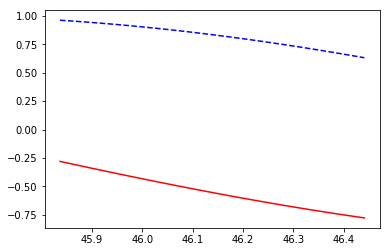

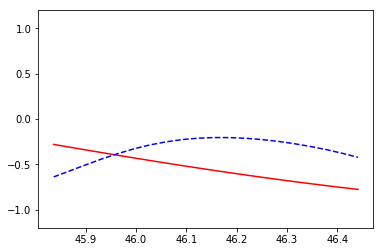

train cost:  0.06703232


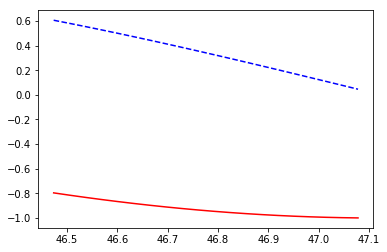

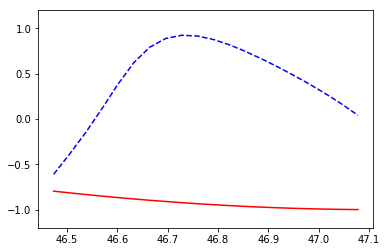

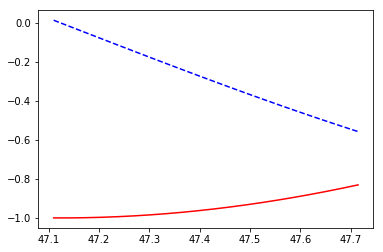

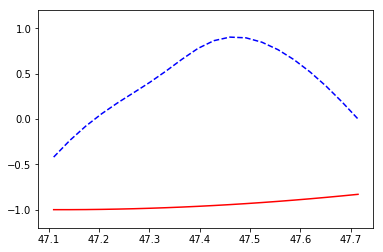

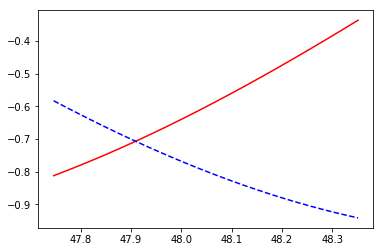

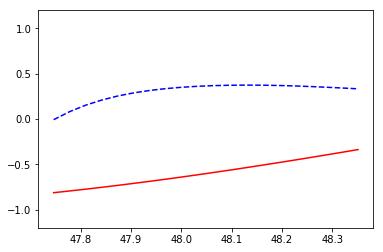

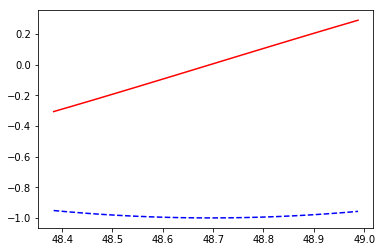

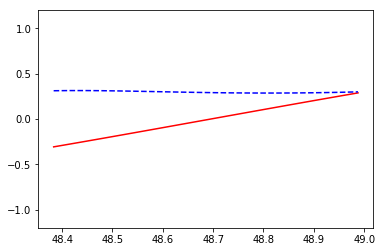

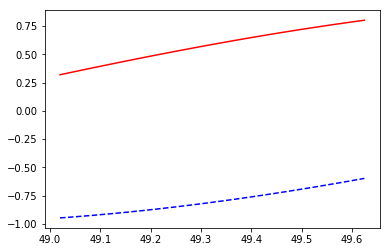

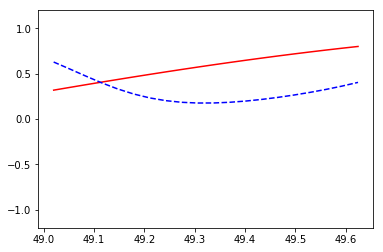

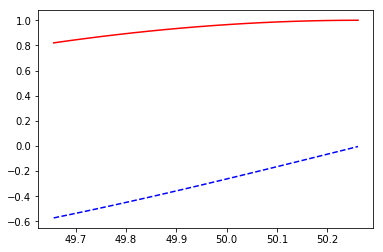

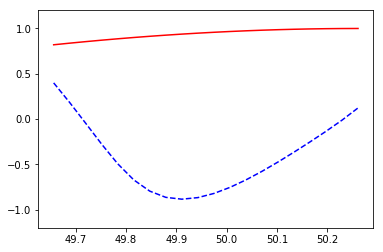

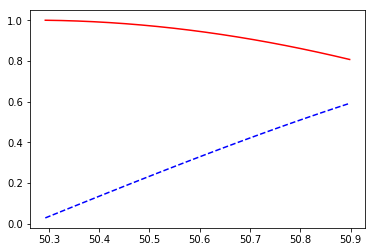

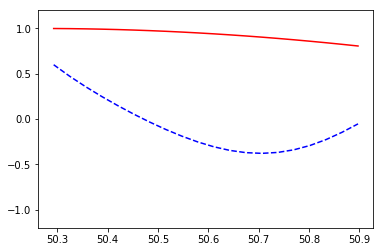

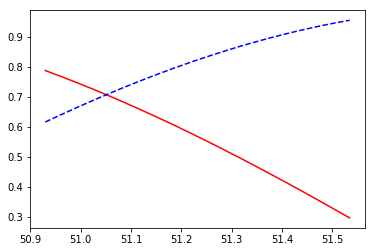

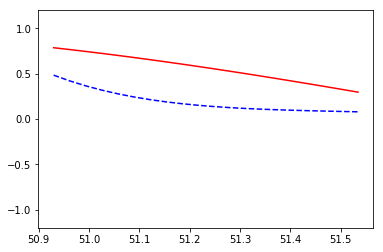

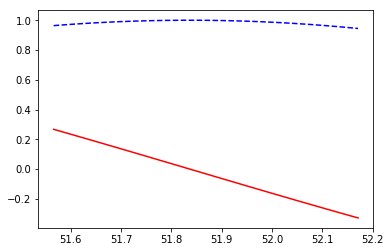

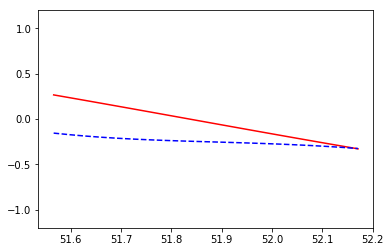

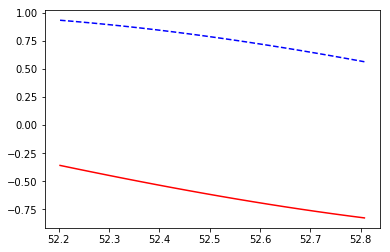

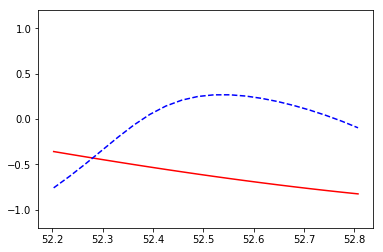

train cost:  0.07721442


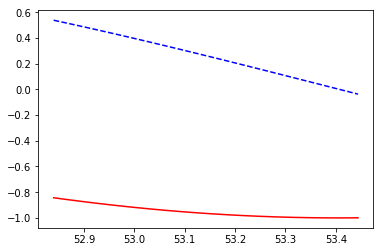

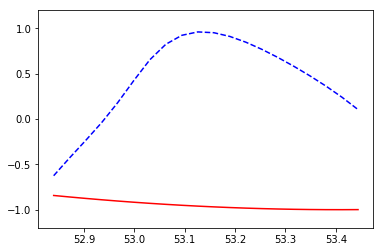

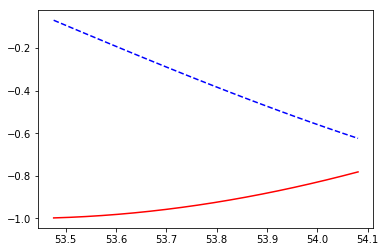

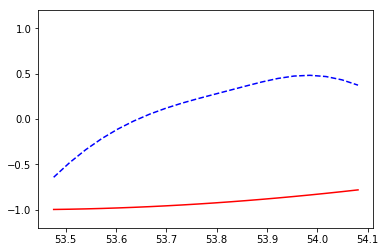

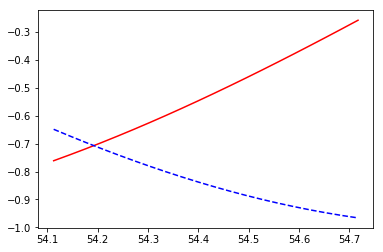

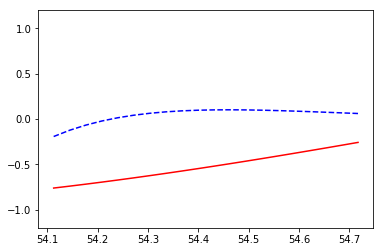

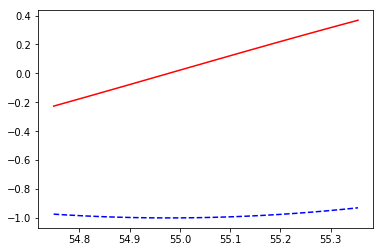

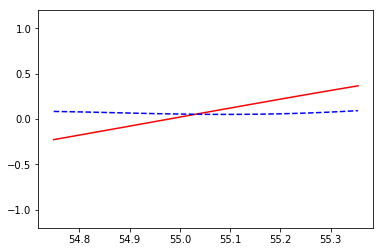

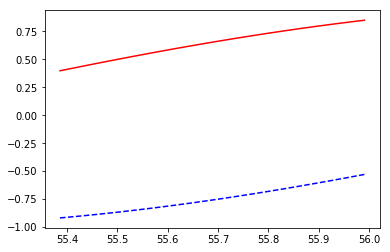

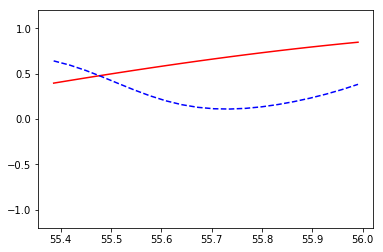

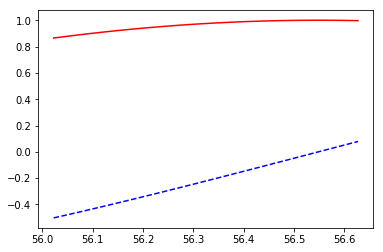

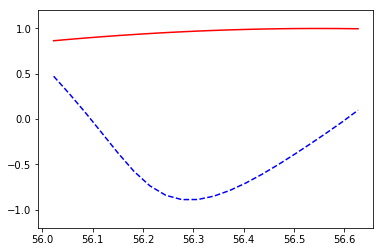

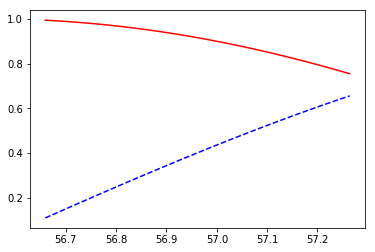

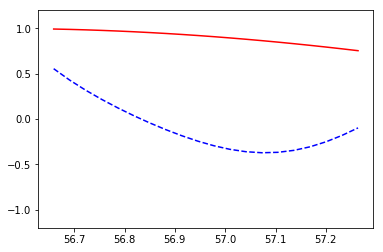

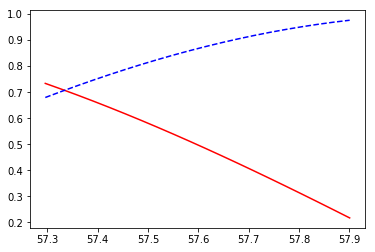

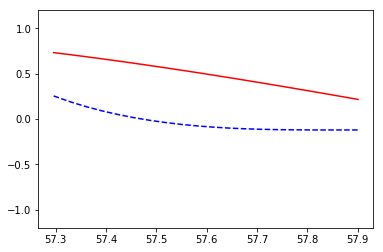

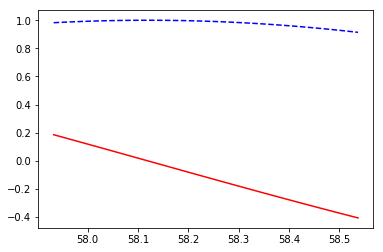

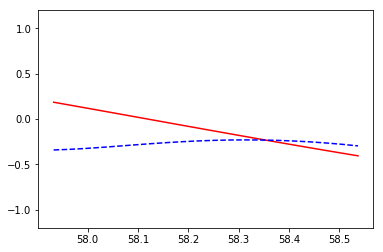

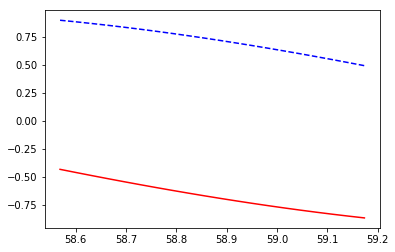

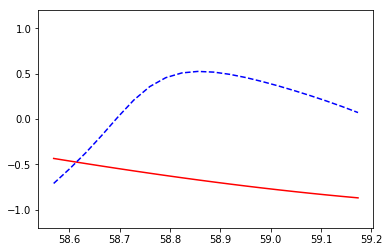

train cost:  0.091070935


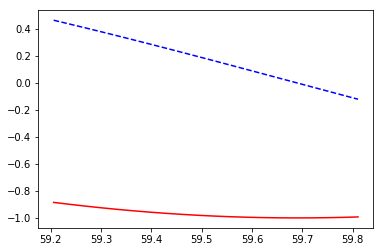

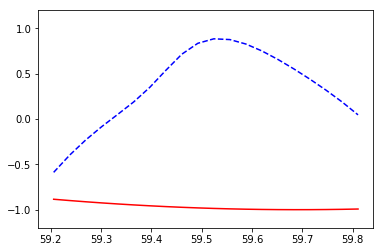

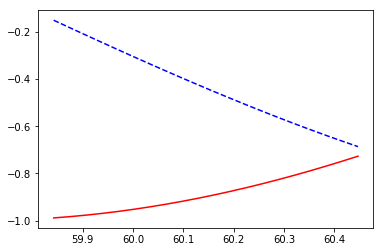

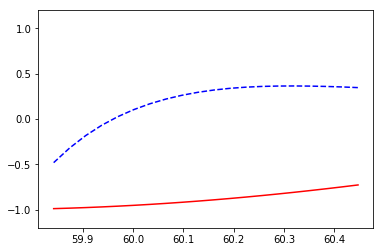

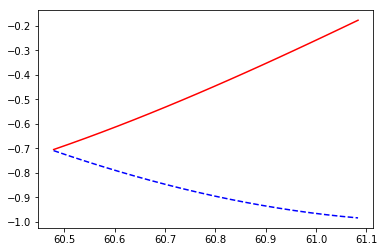

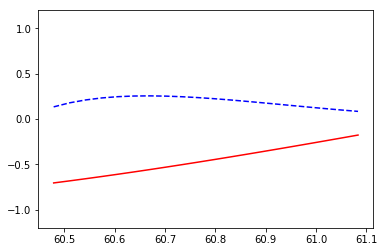

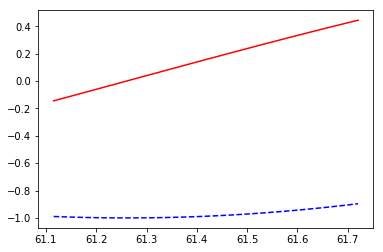

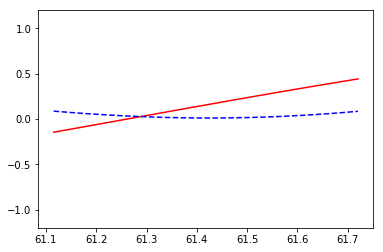

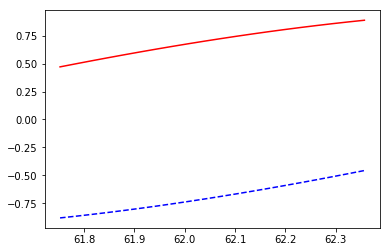

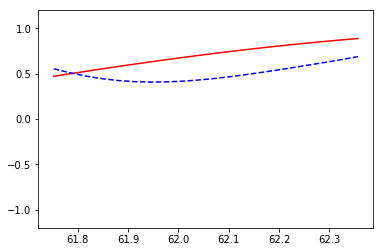

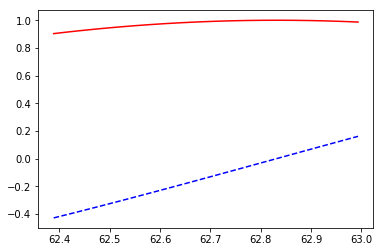

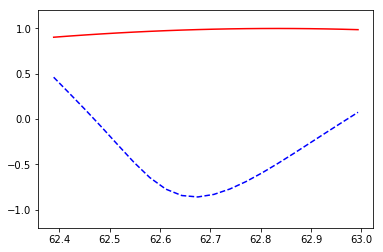

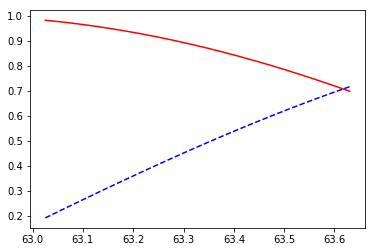

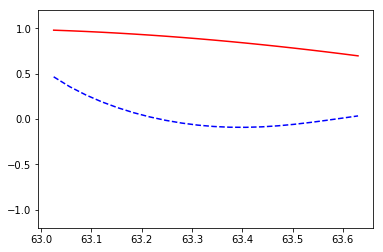

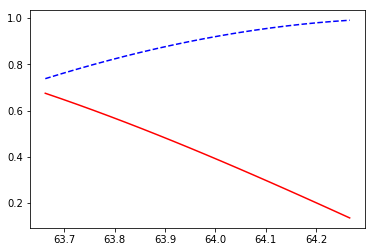

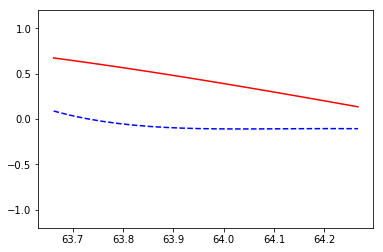

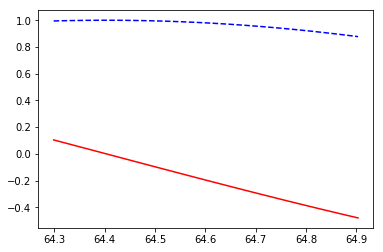

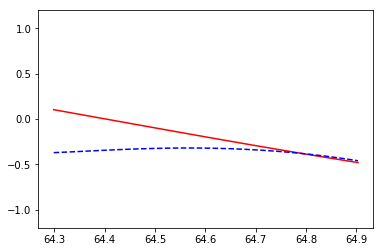

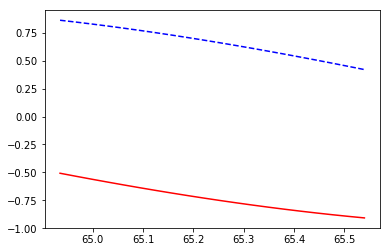

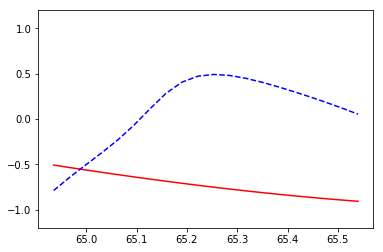

train cost:  0.11608672


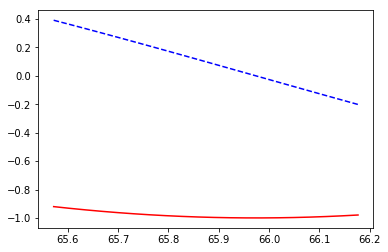

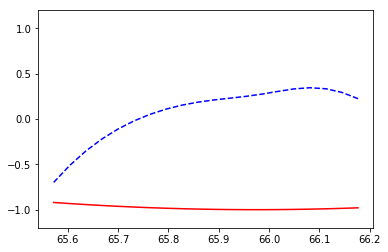

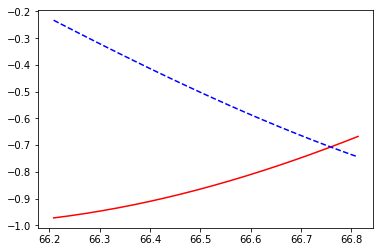

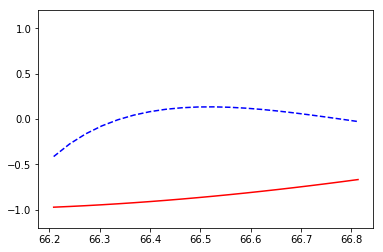

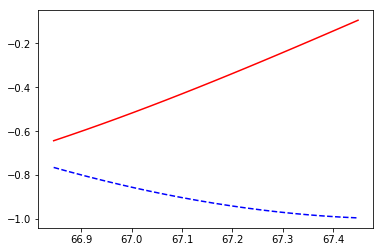

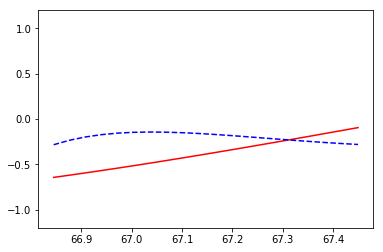

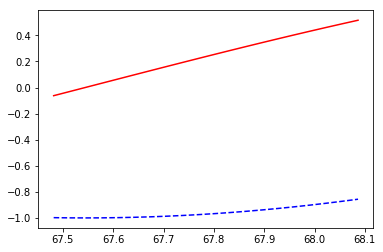

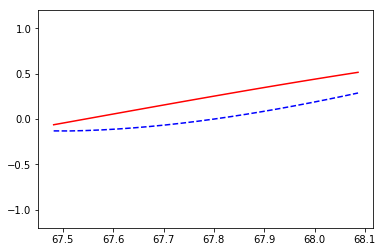

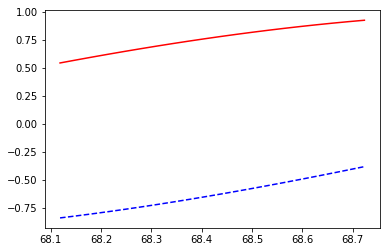

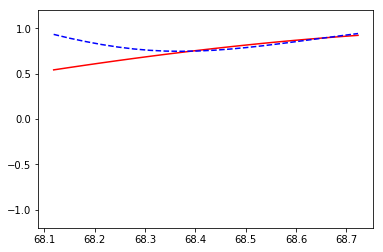

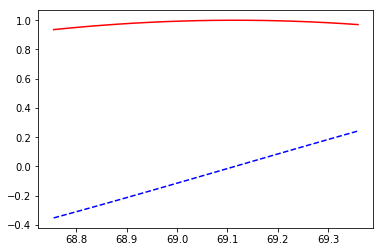

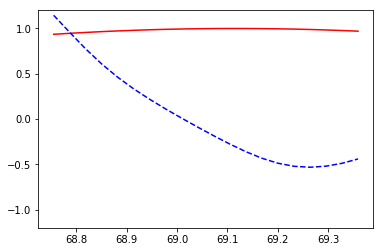

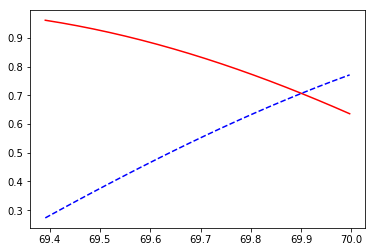

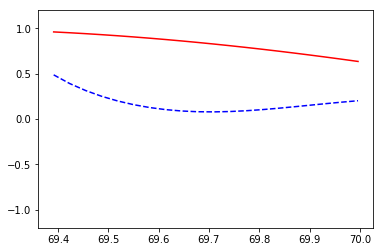

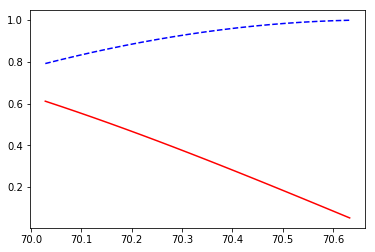

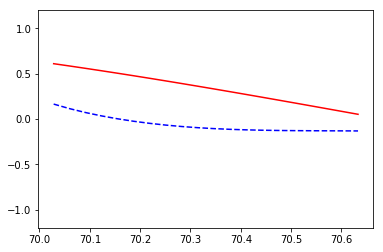

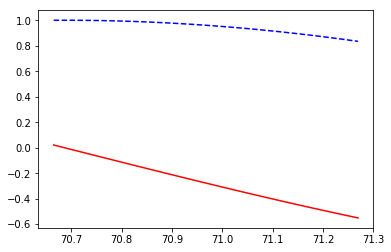

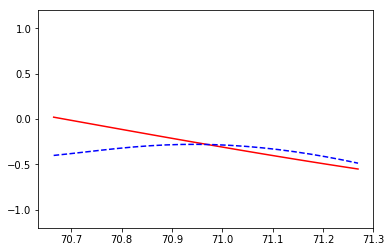

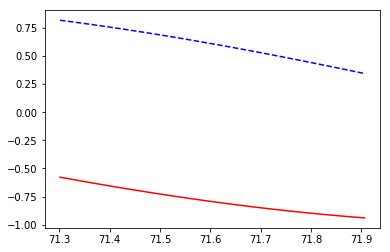

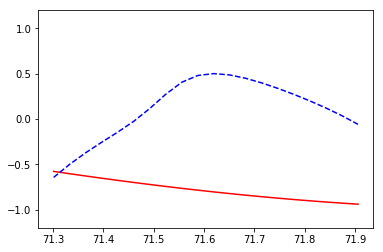

train cost:  0.06484639


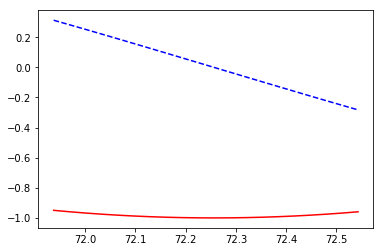

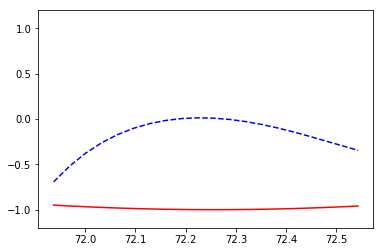

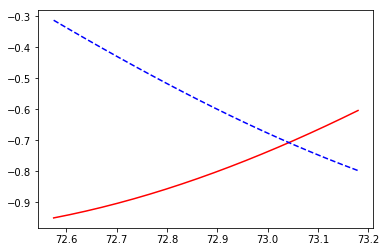

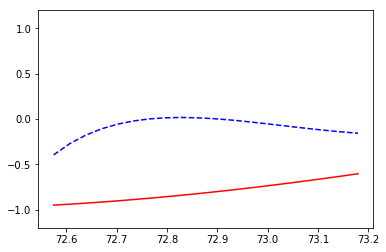

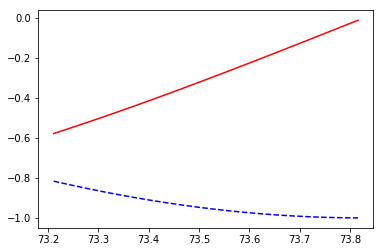

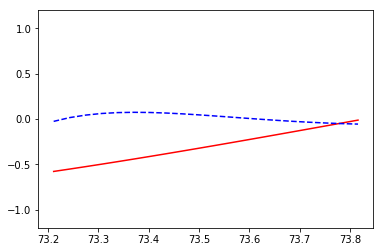

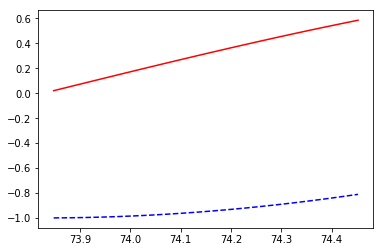

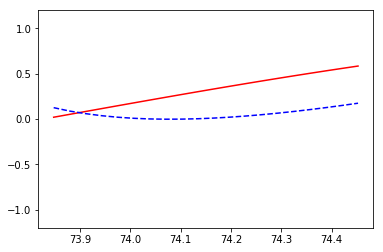

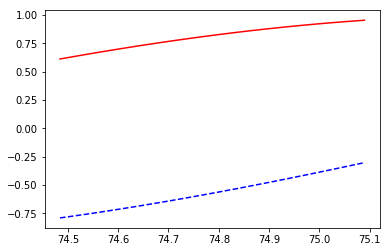

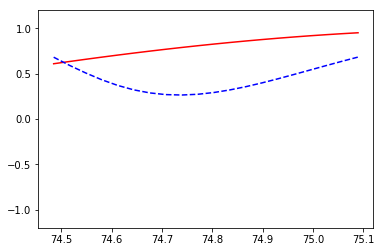

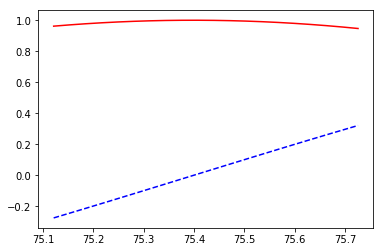

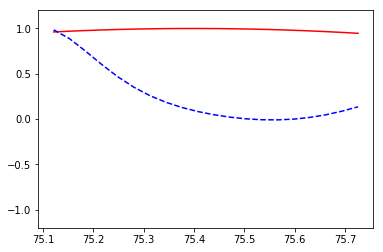

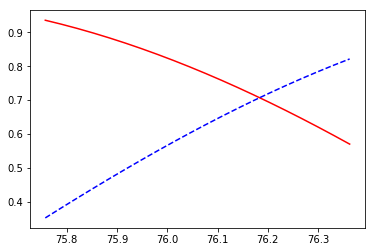

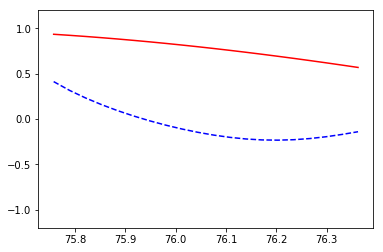

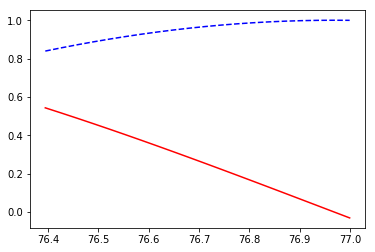

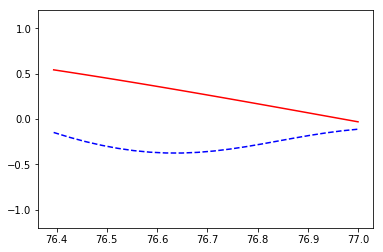

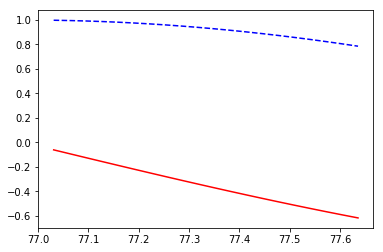

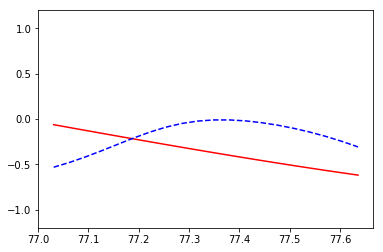

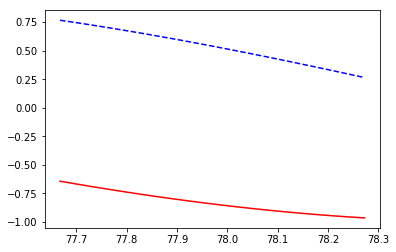

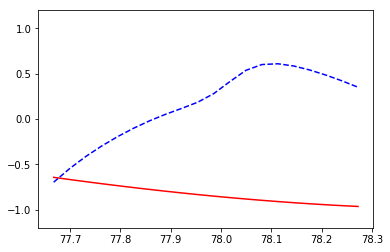

train cost:  0.06972626


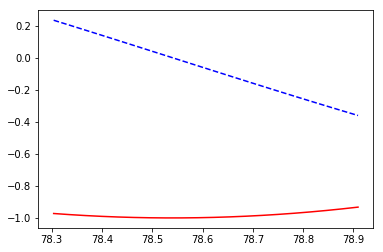

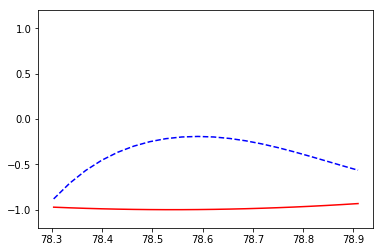

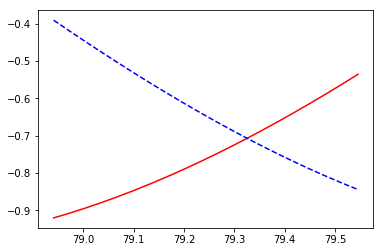

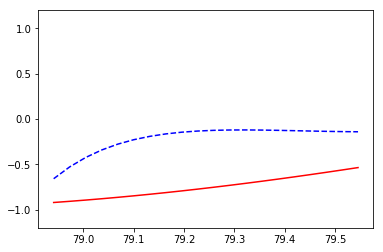

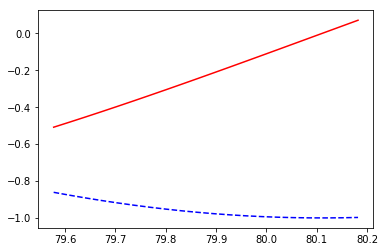

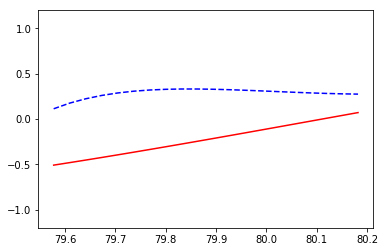

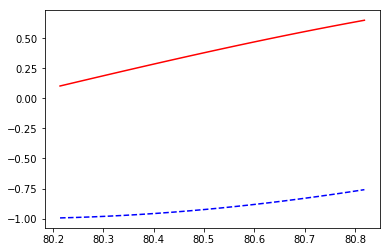

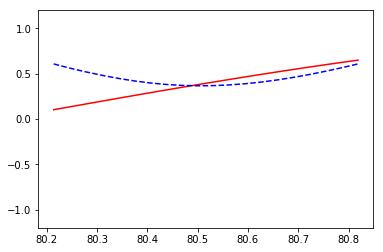

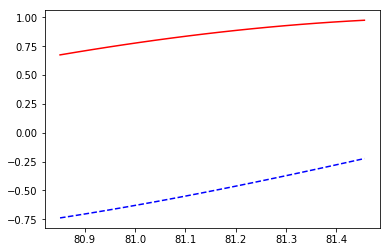

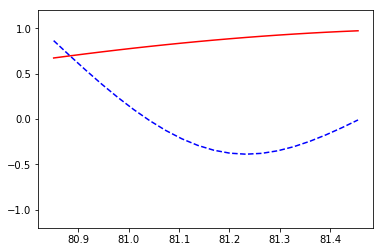

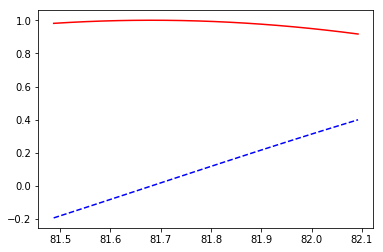

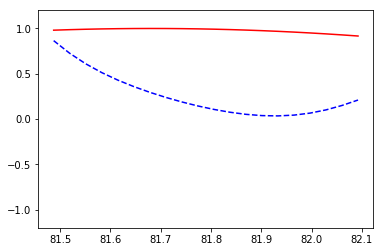

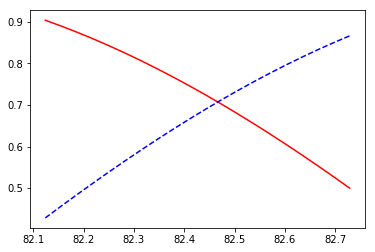

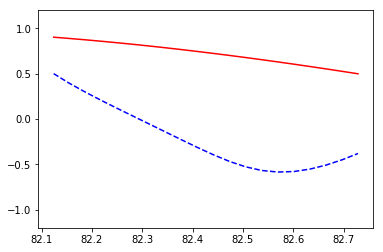

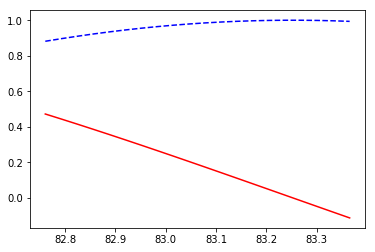

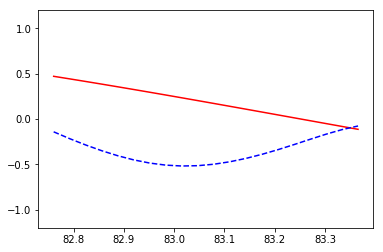

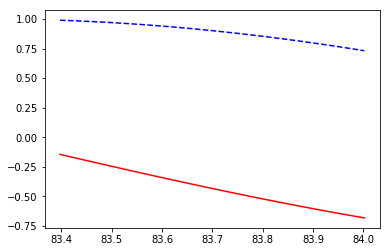

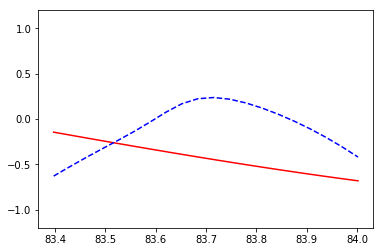

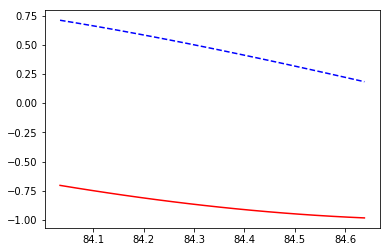

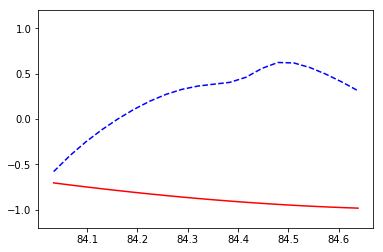

train cost:  0.08303033


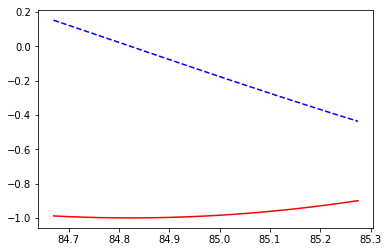

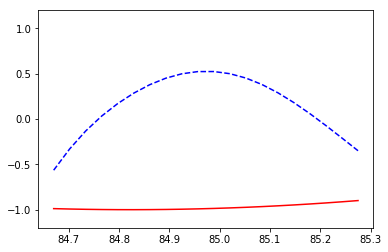

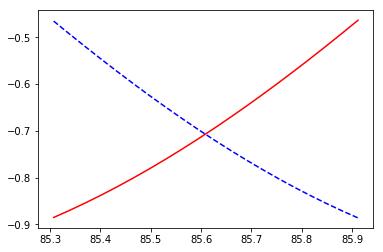

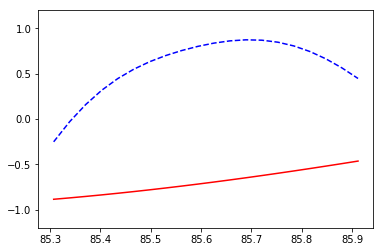

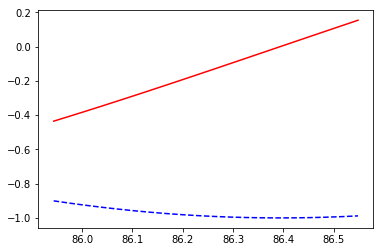

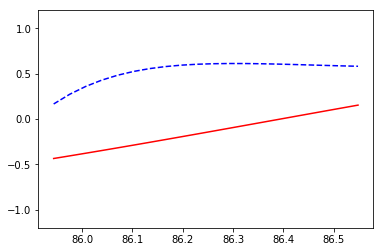

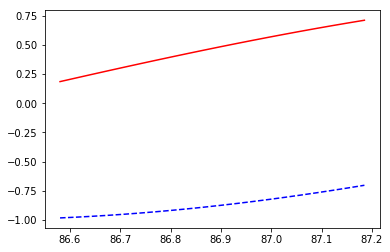

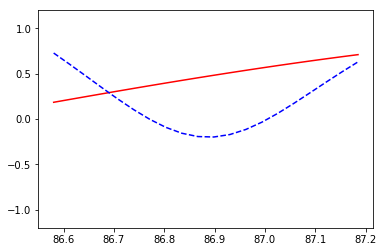

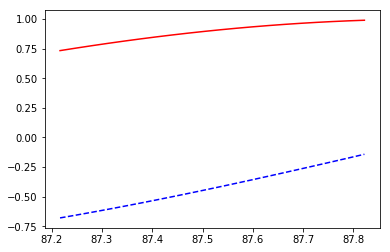

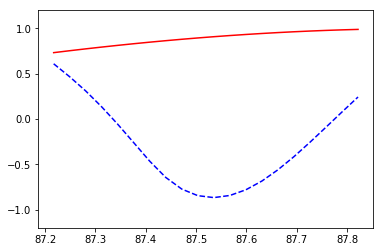

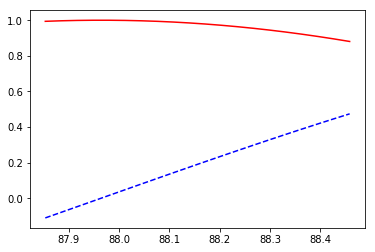

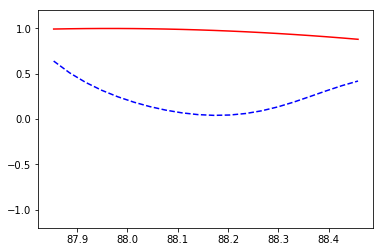

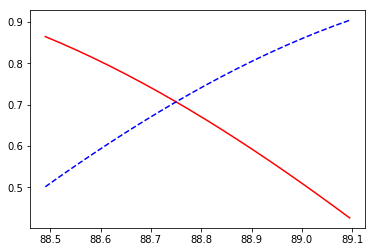

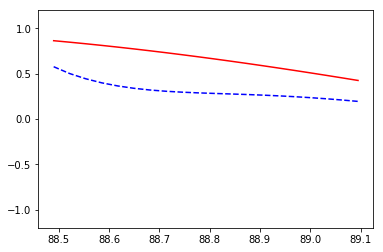

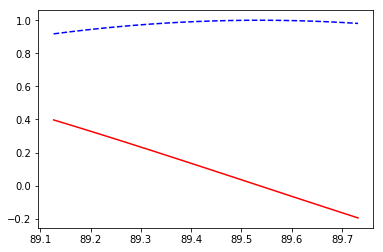

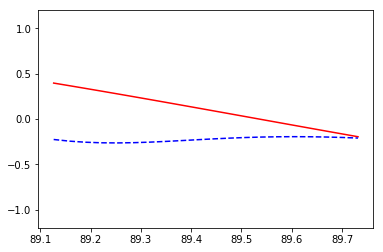

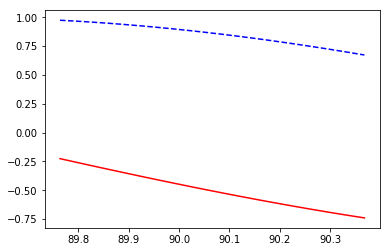

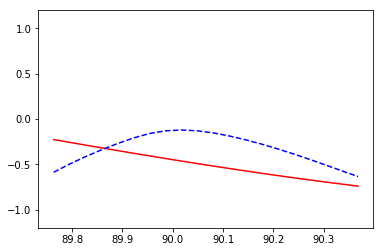

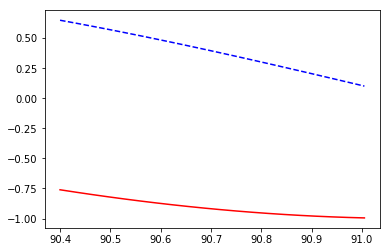

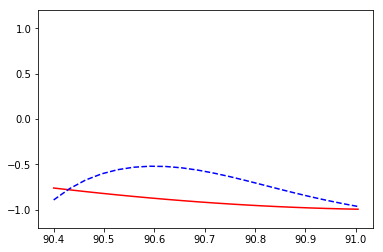

train cost:  0.07037481


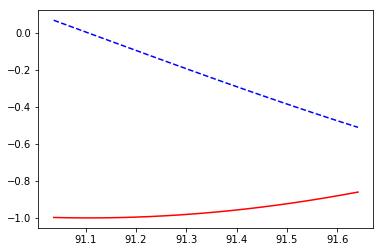

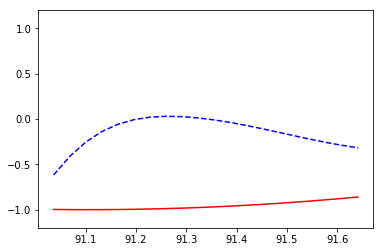

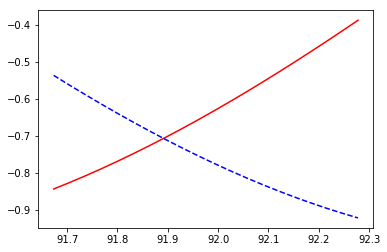

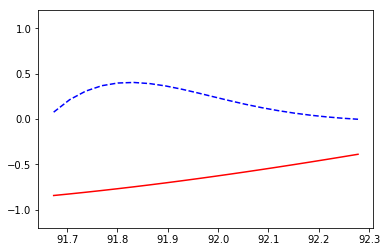

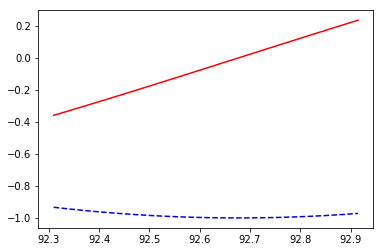

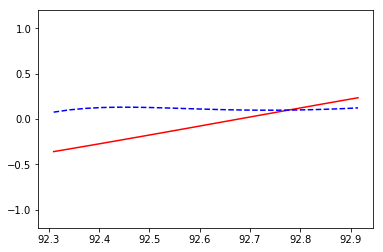

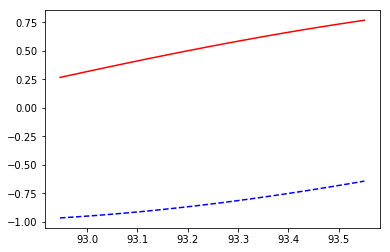

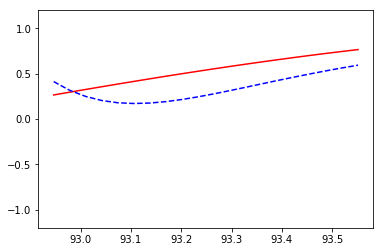

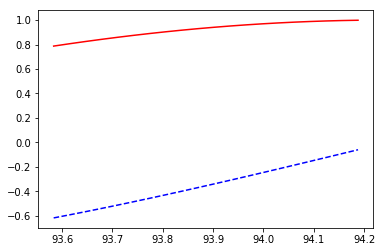

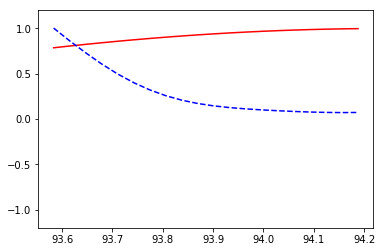

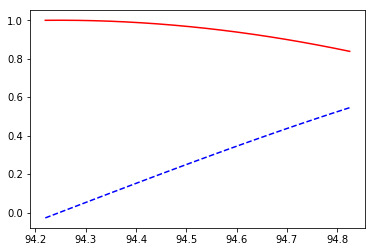

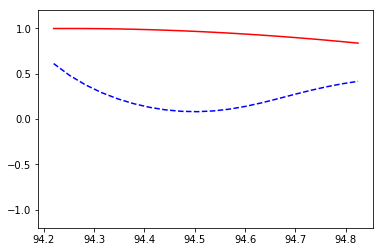

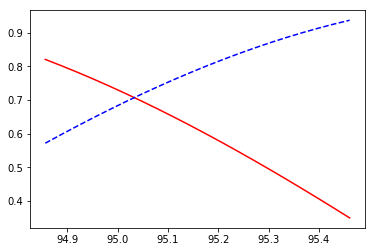

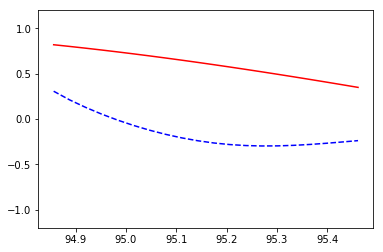

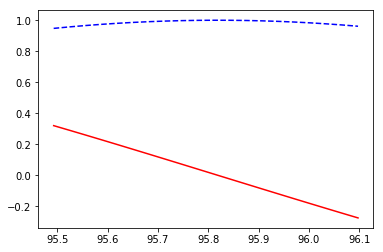

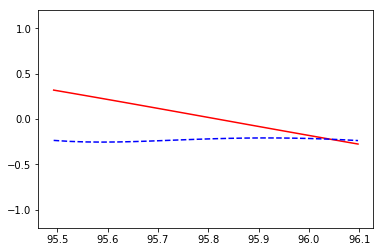

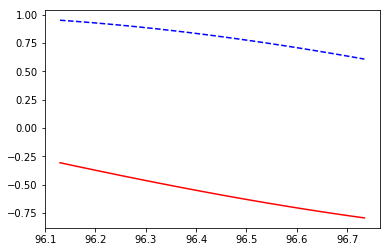

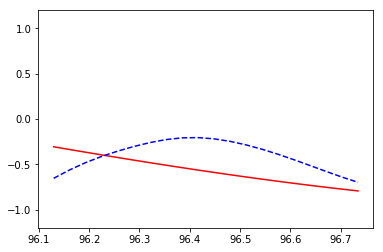

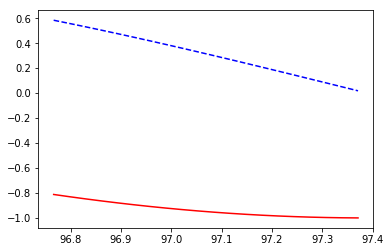

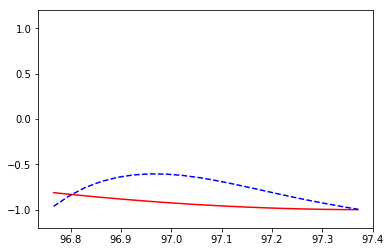

train cost:  0.033924535


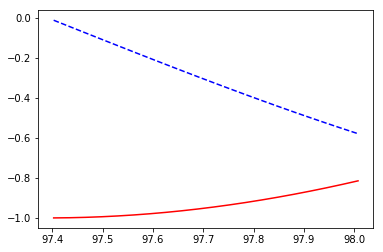

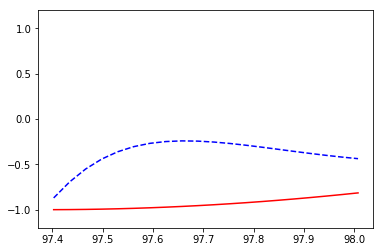

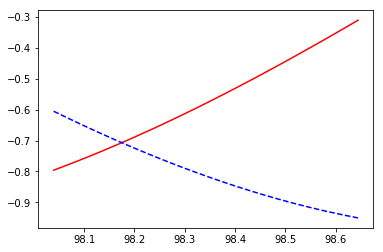

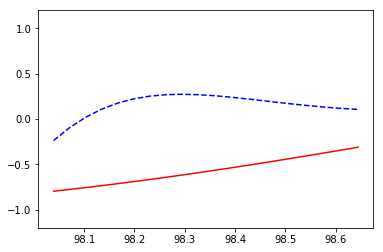

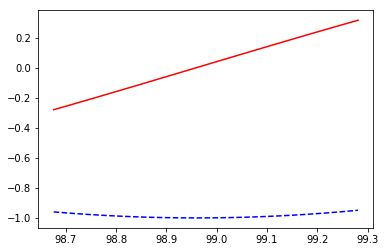

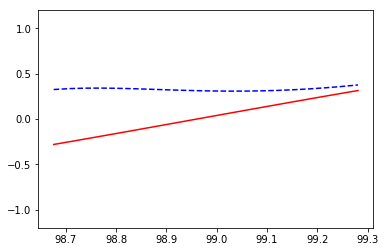

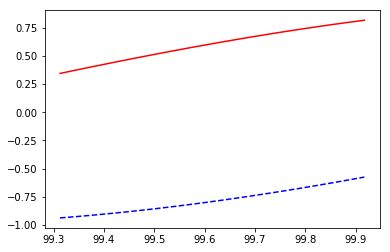

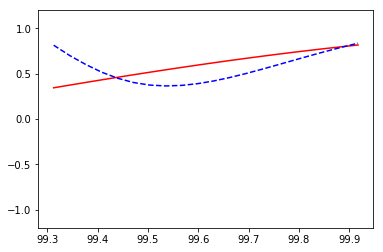

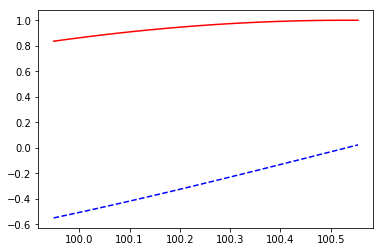

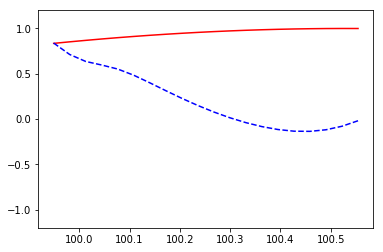

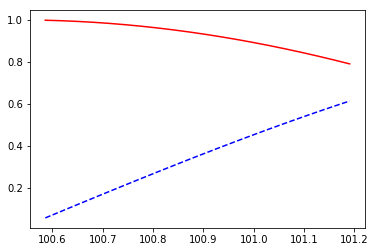

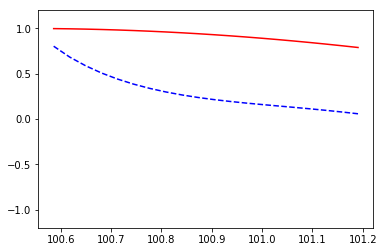

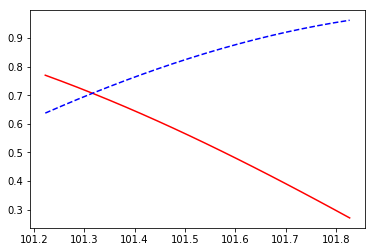

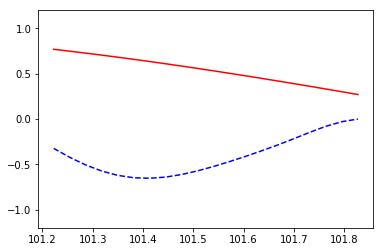

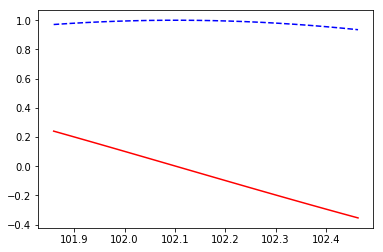

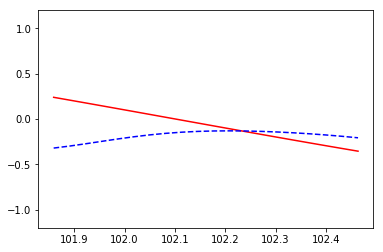

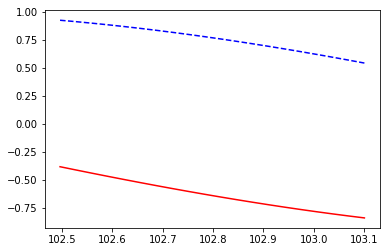

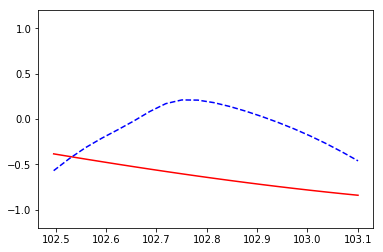

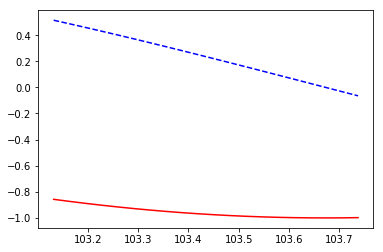

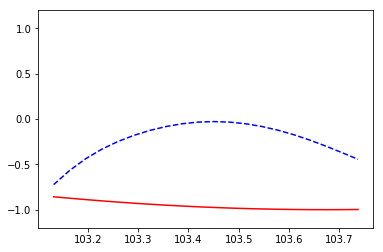

train cost:  0.04008342


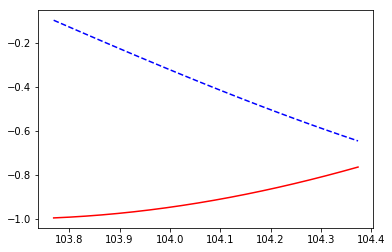

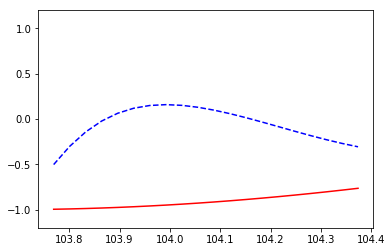

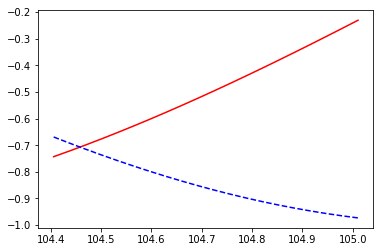

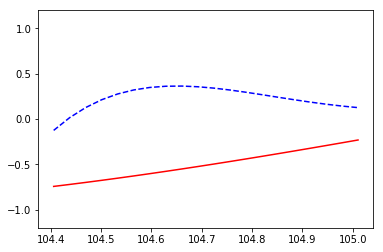

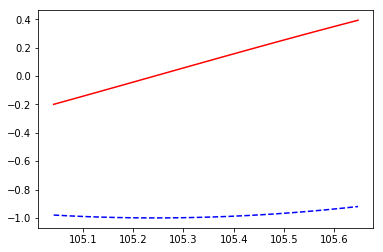

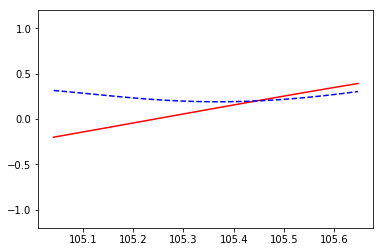

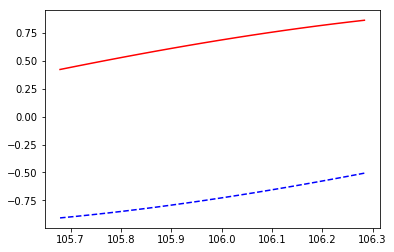

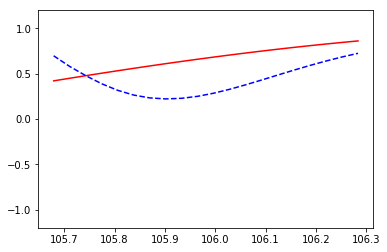

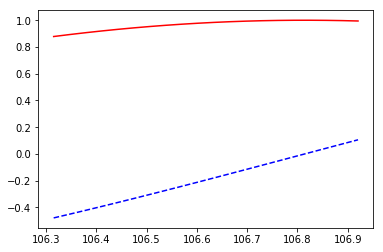

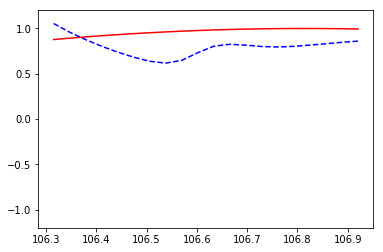

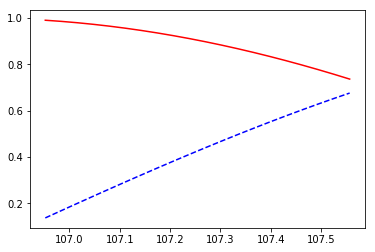

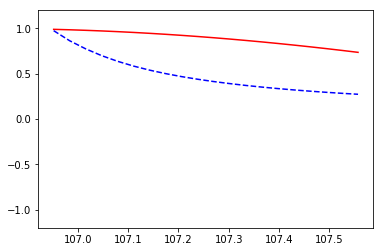

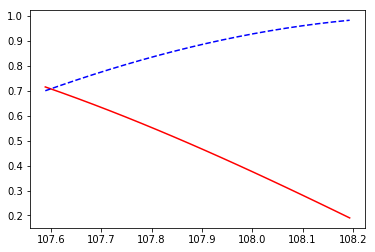

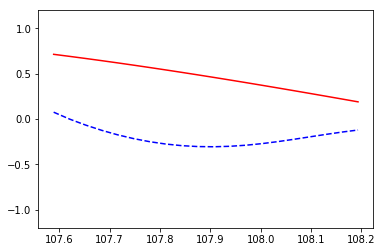

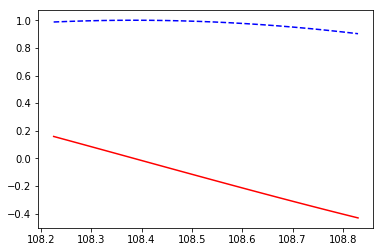

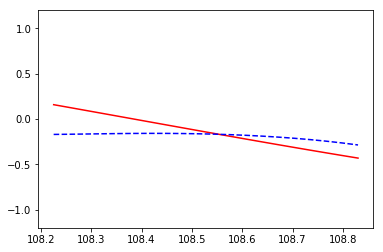

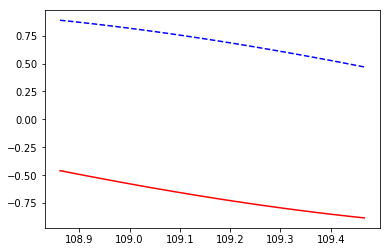

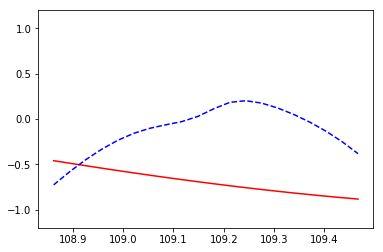

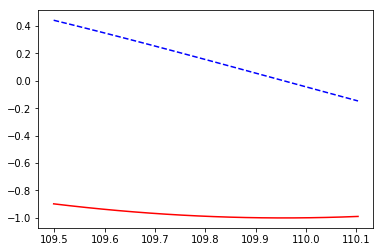

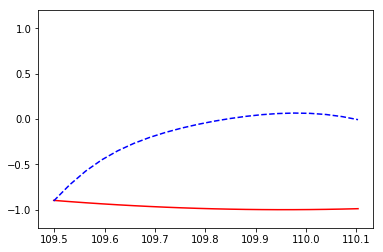

train cost:  0.048600484


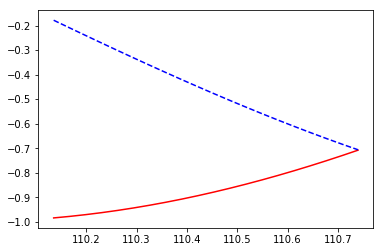

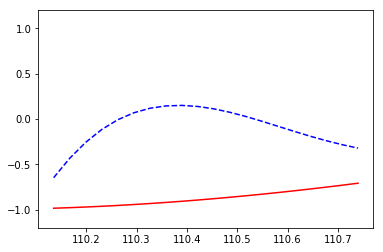

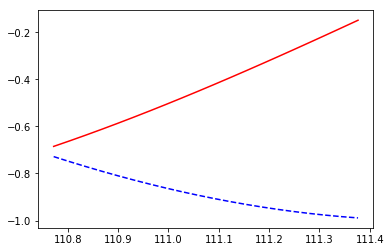

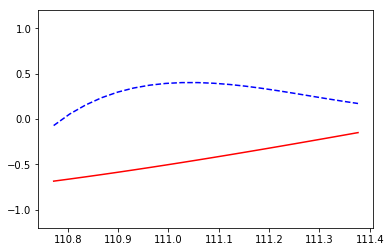

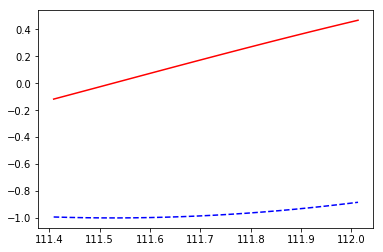

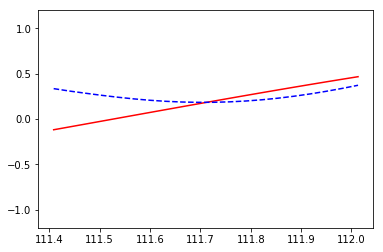

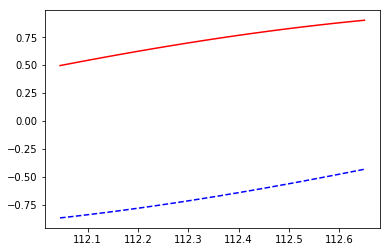

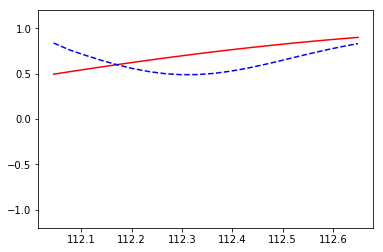

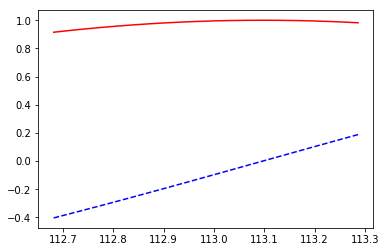

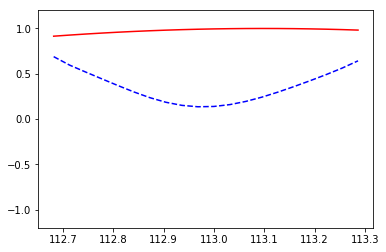

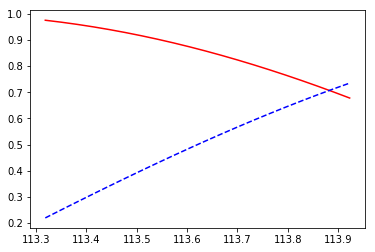

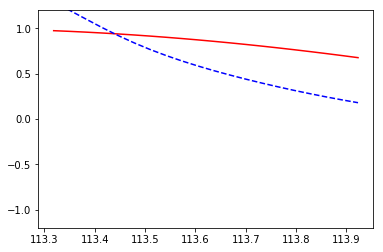

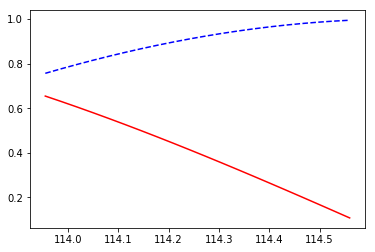

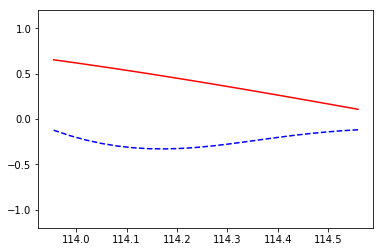

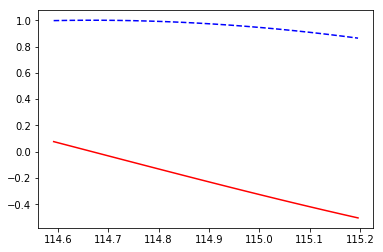

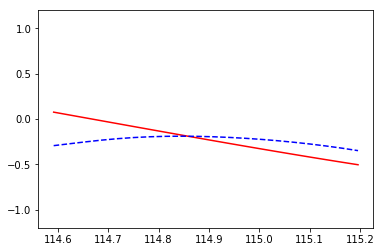

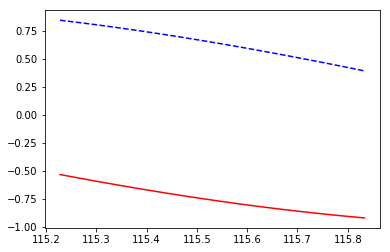

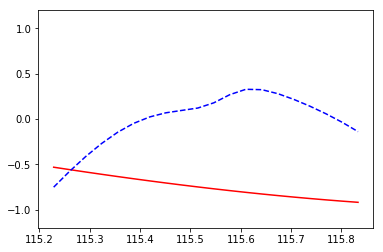

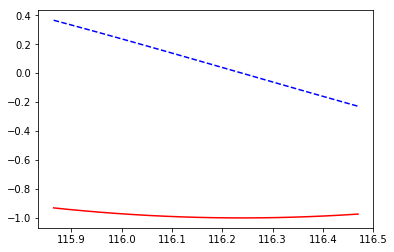

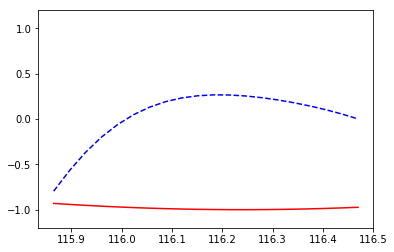

train cost:  0.060039684


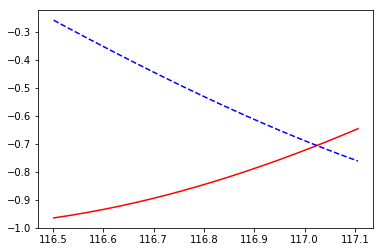

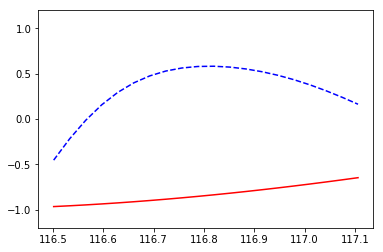

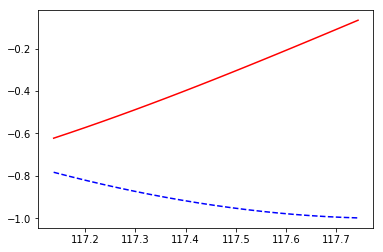

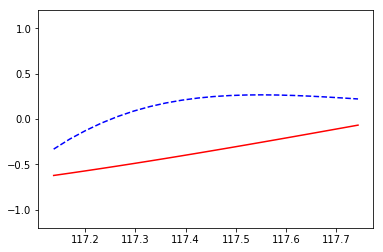

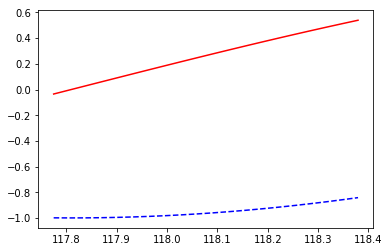

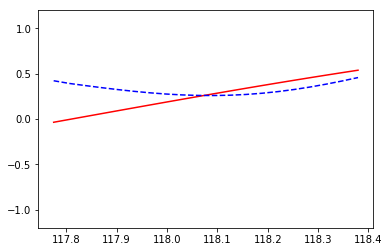

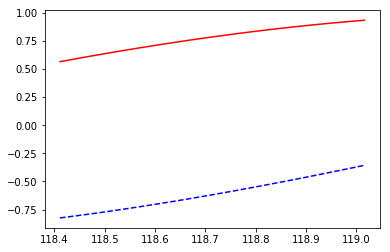

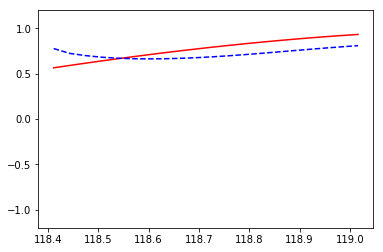

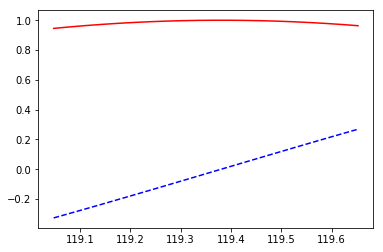

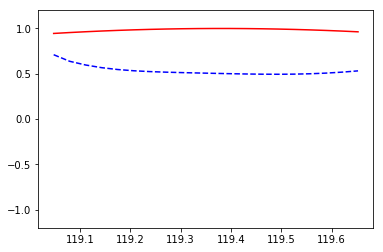

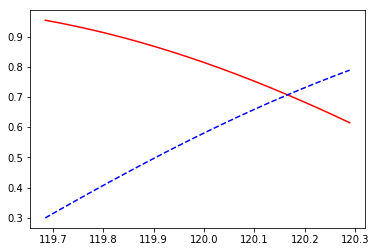

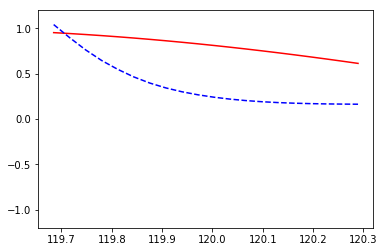

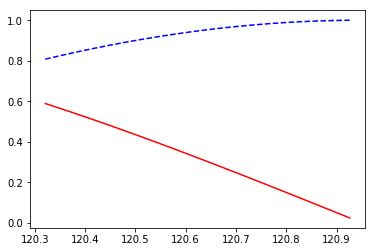

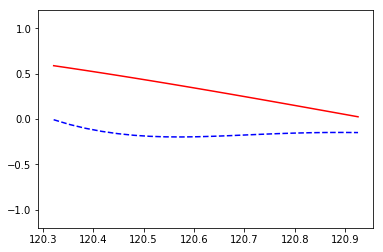

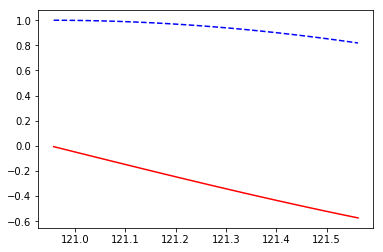

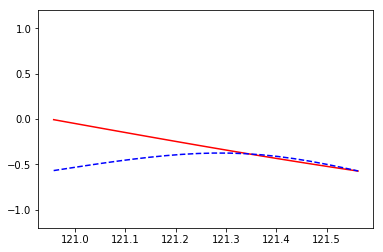

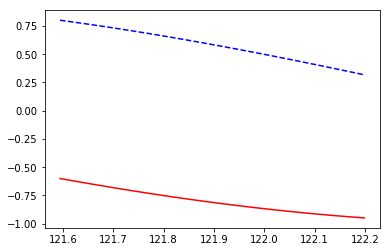

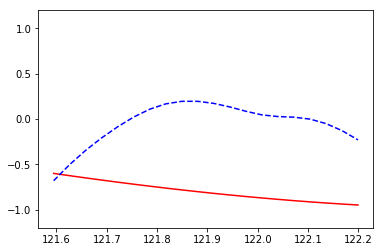

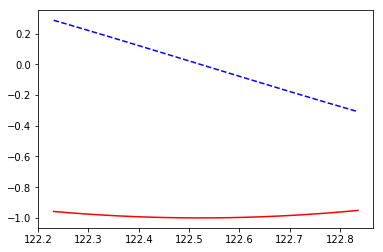

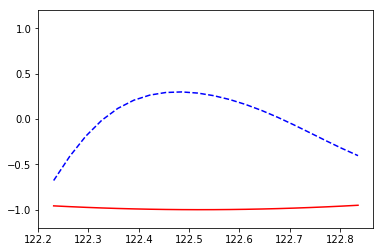

train cost:  0.045183595


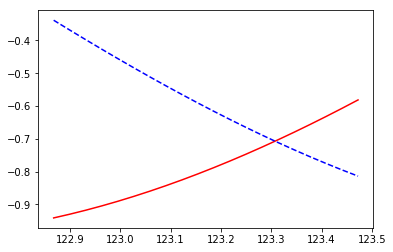

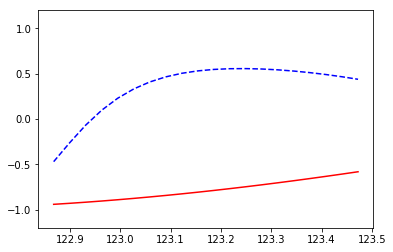

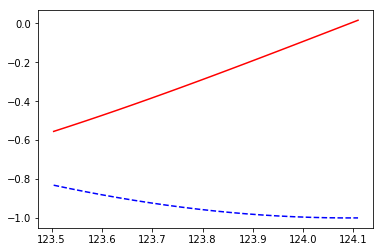

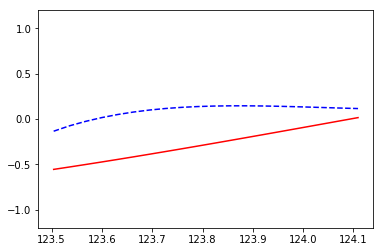

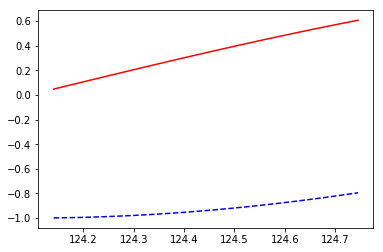

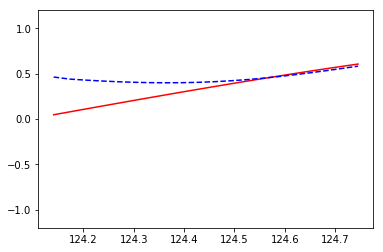

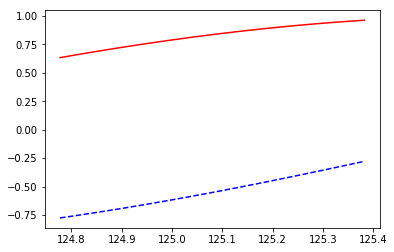

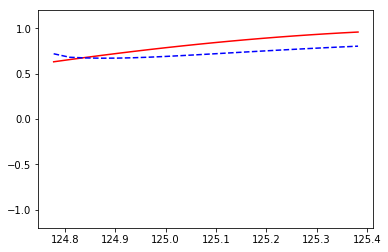

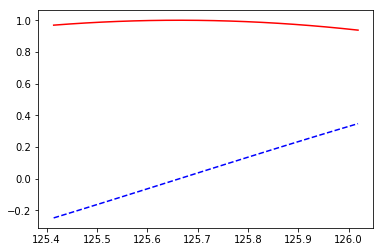

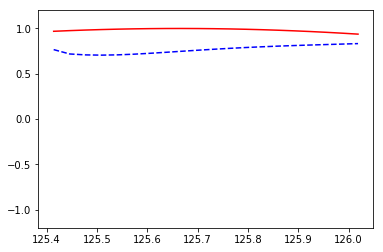

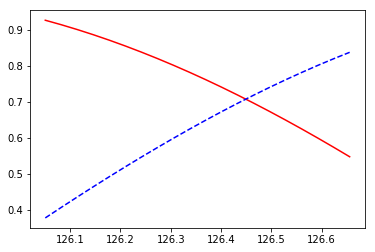

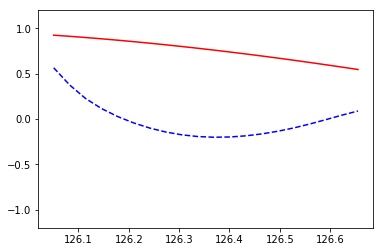

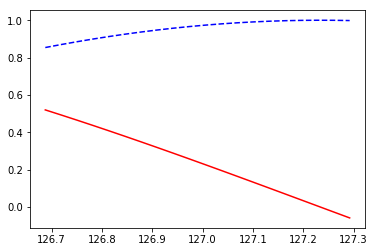

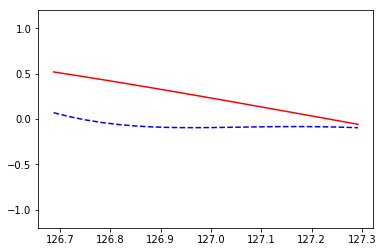

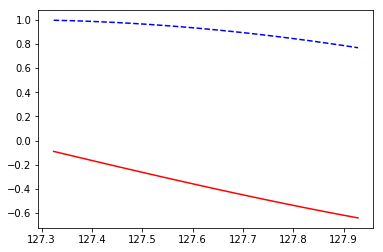

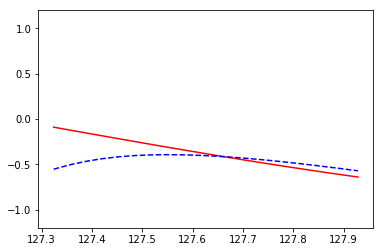

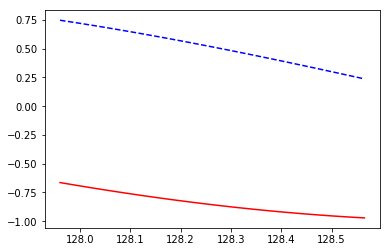

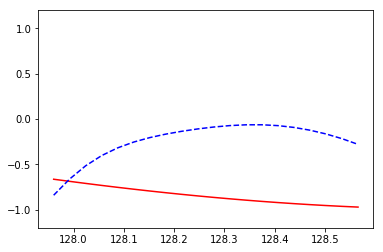

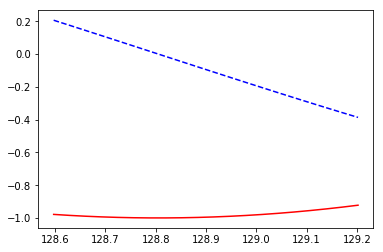

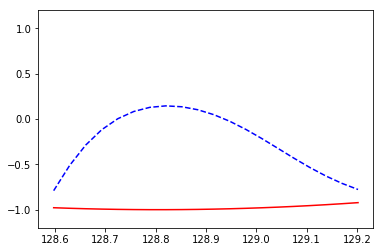

train cost:  0.040041685


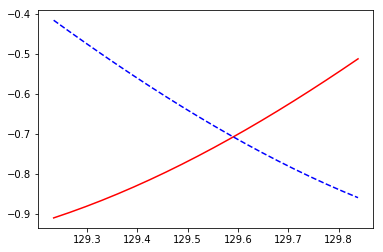

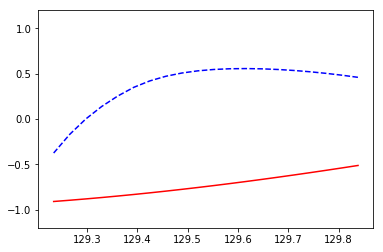

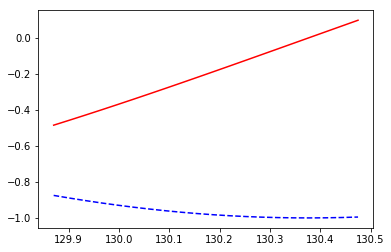

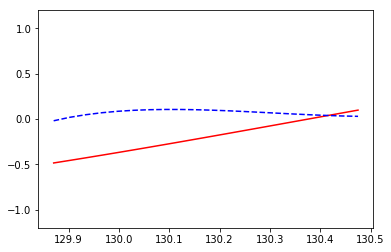

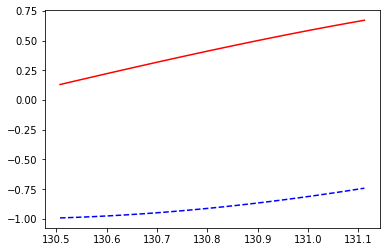

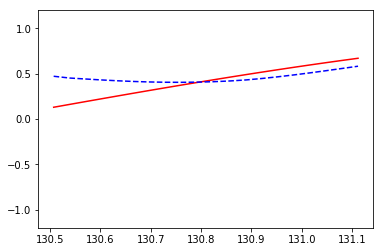

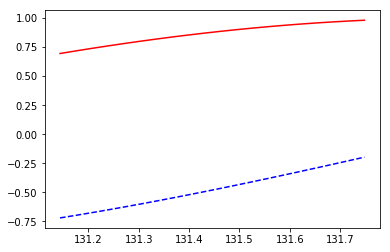

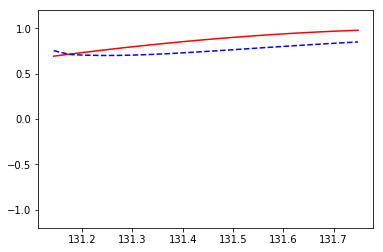

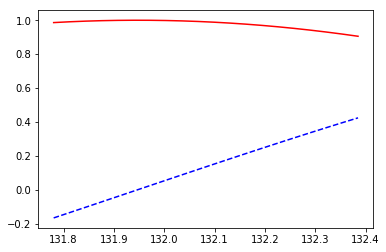

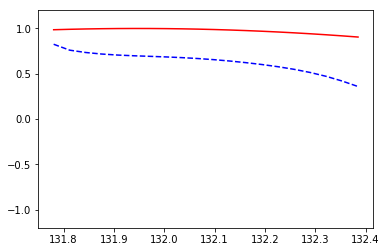

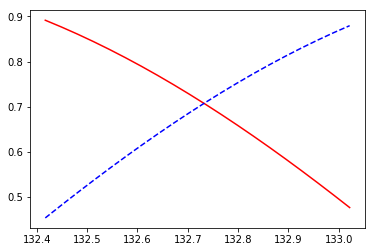

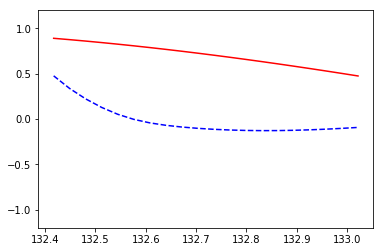

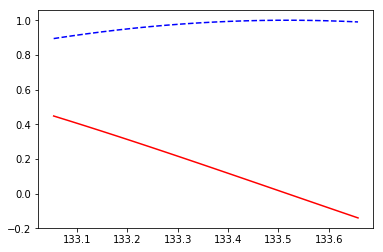

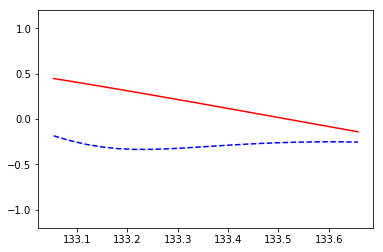

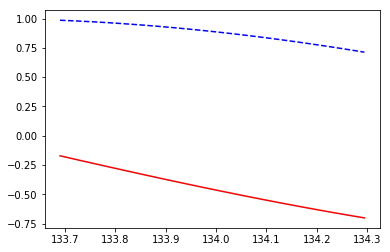

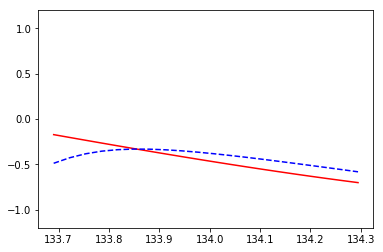

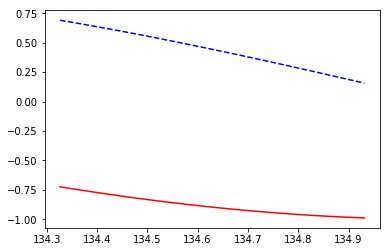

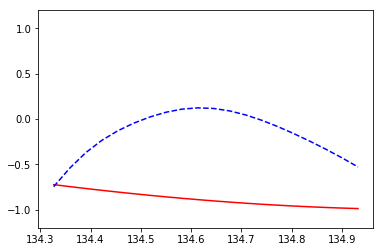

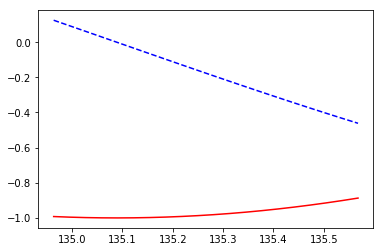

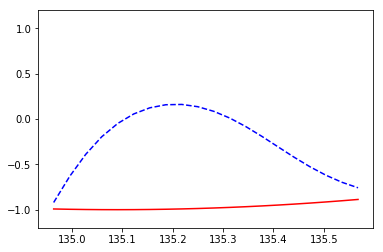

train cost:  0.03547412


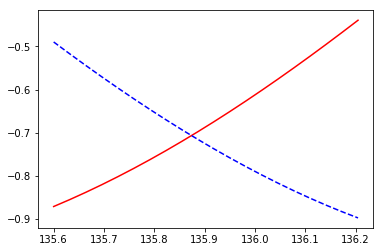

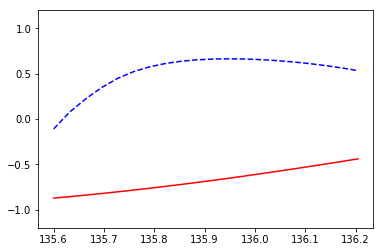

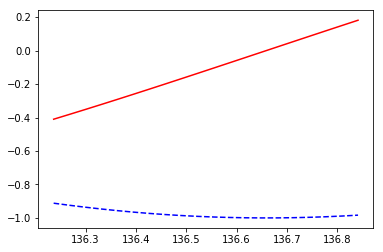

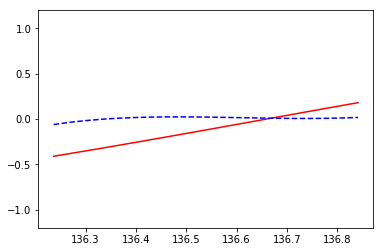

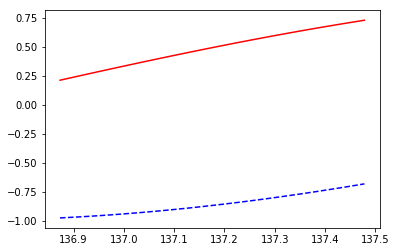

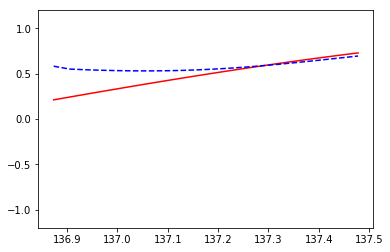

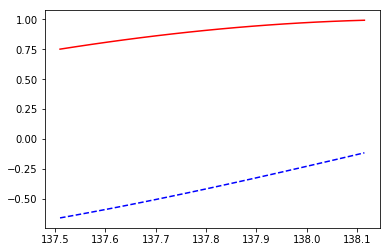

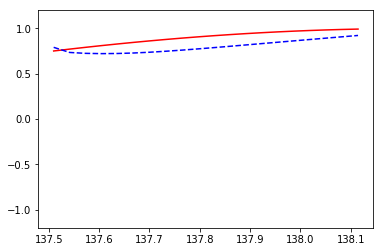

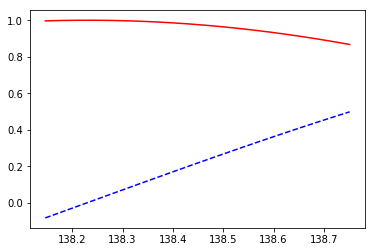

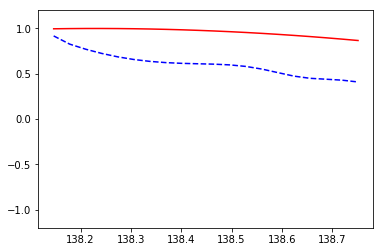

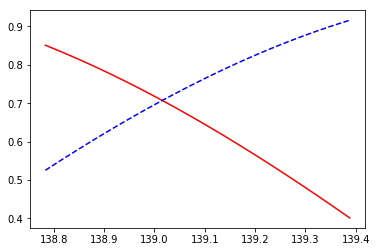

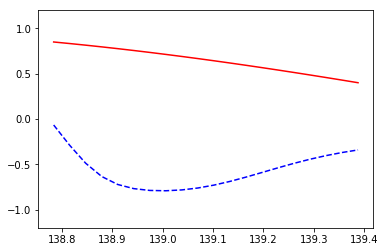

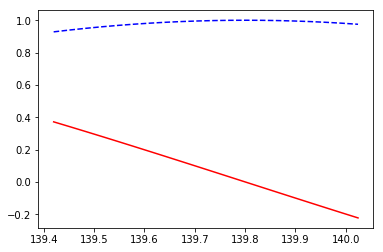

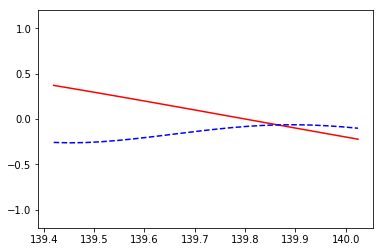

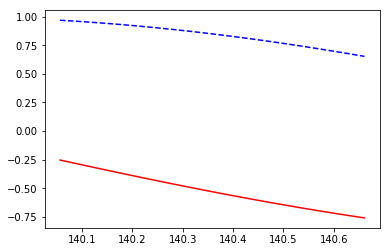

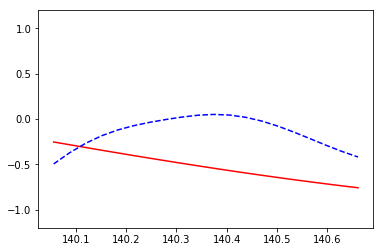

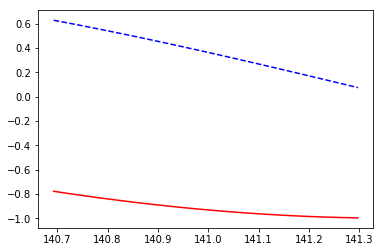

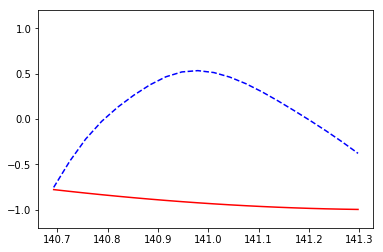

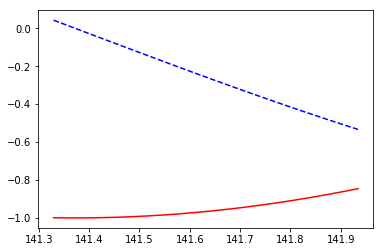

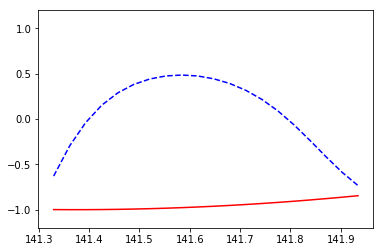

train cost:  0.061501928


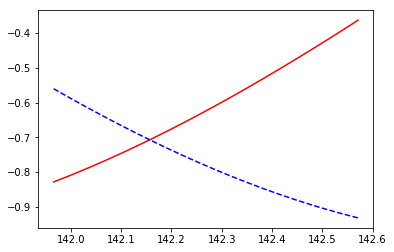

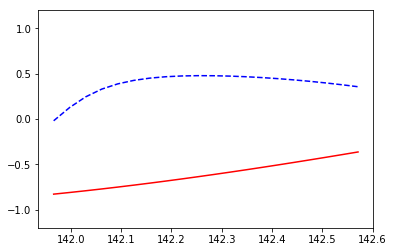

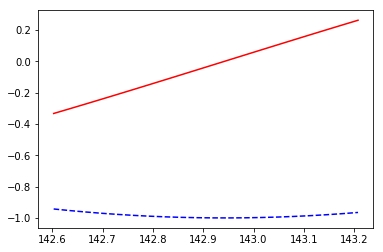

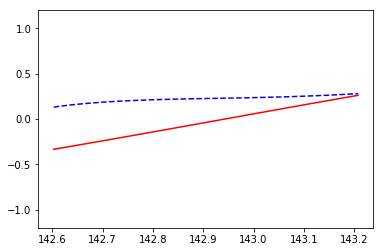

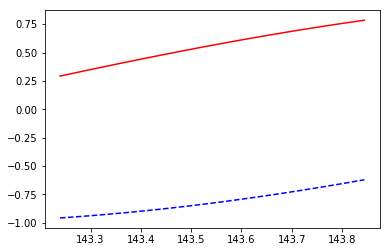

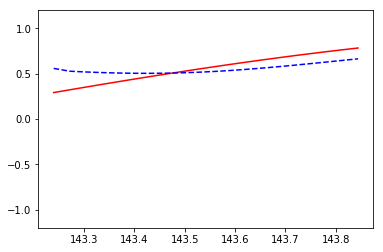

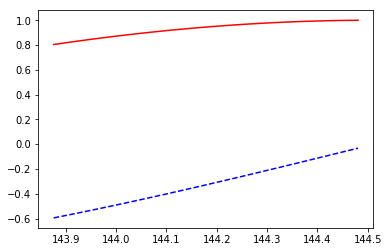

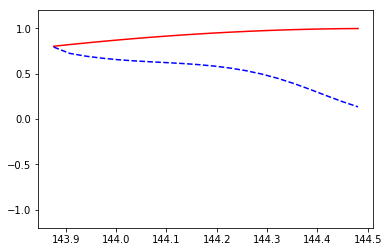

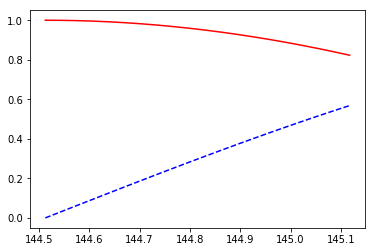

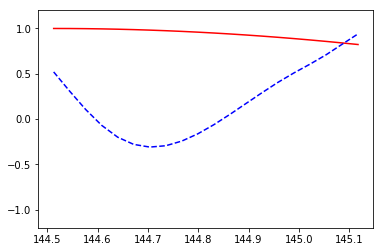

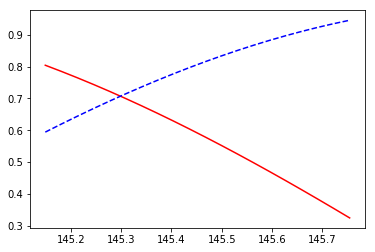

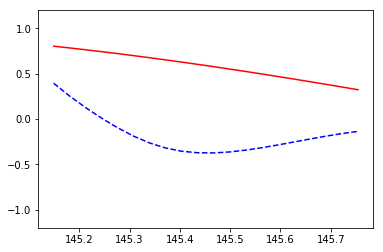

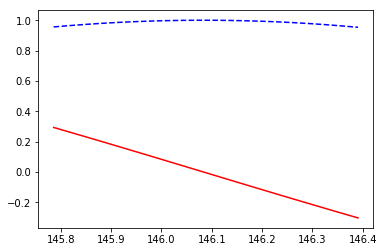

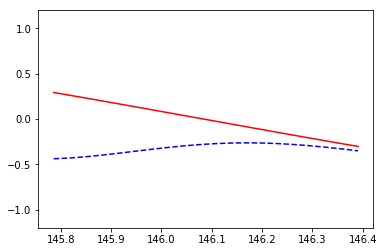

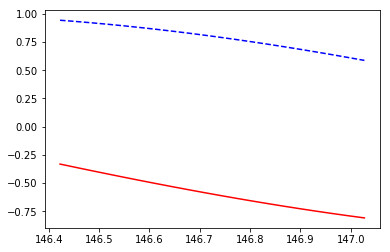

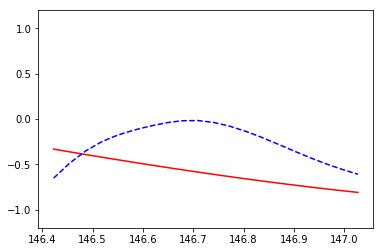

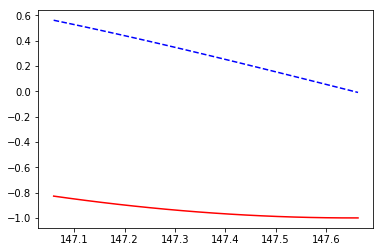

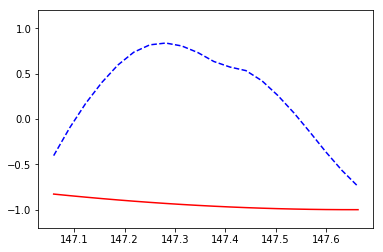

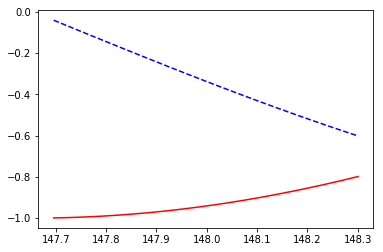

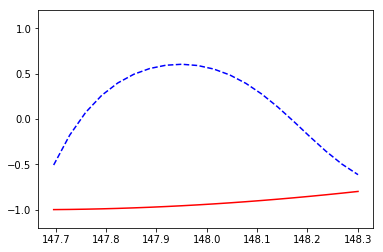

train cost:  0.028707972


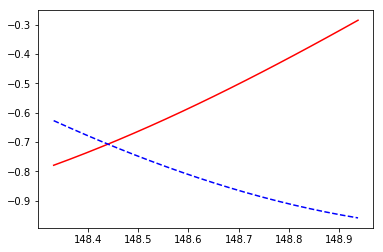

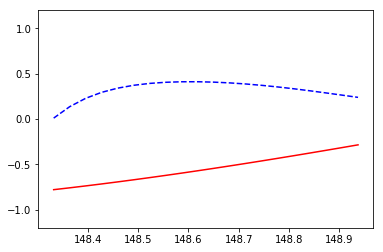

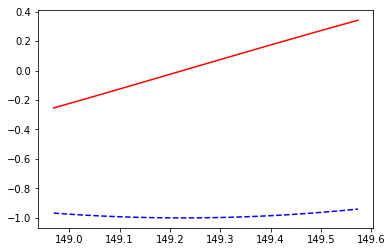

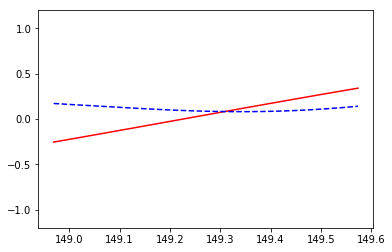

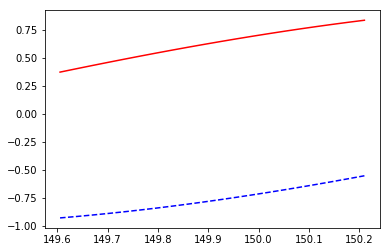

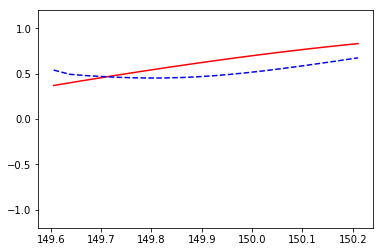

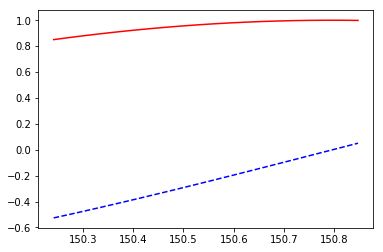

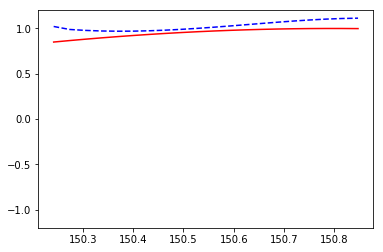

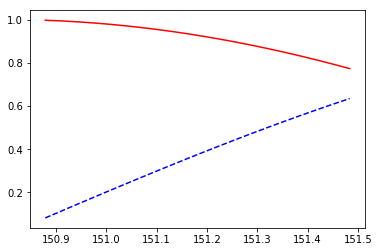

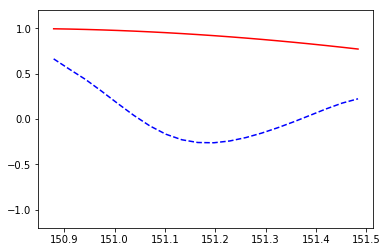

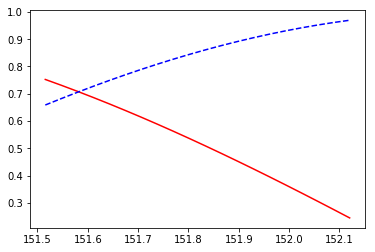

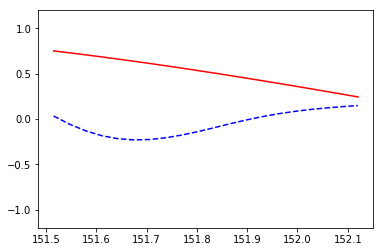

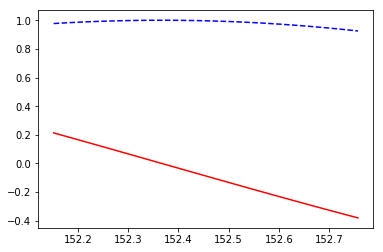

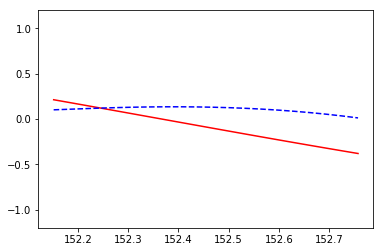

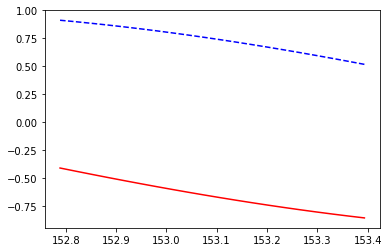

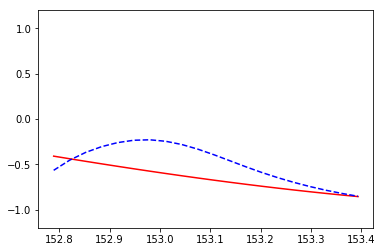

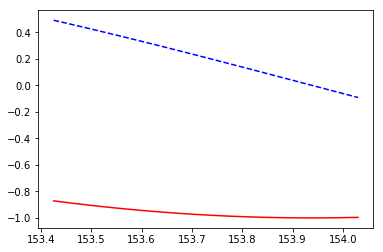

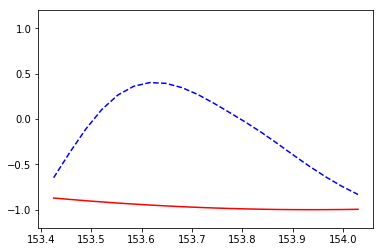

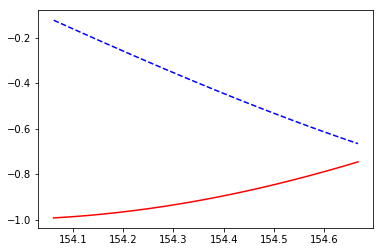

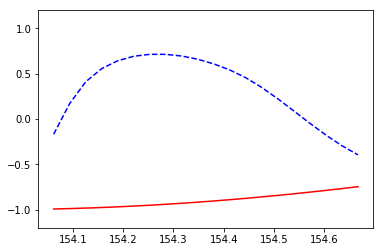

train cost:  0.042331666


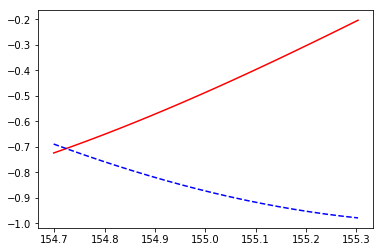

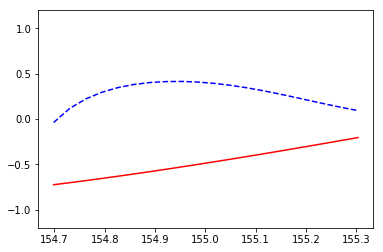

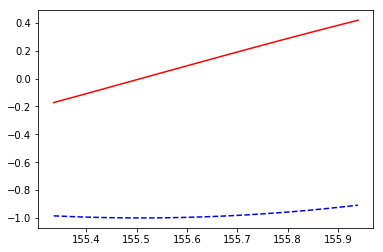

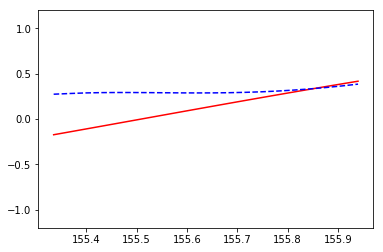

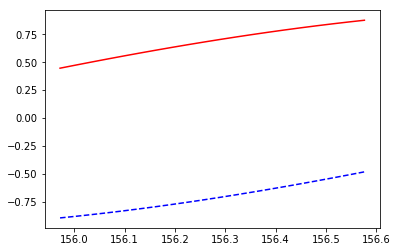

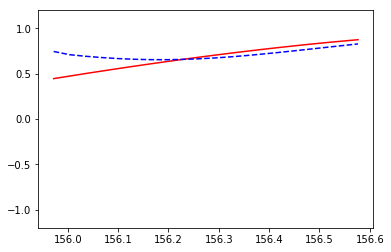

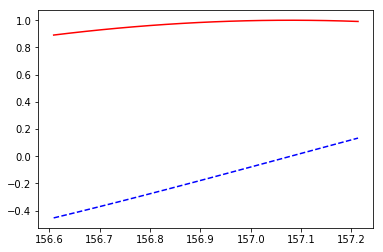

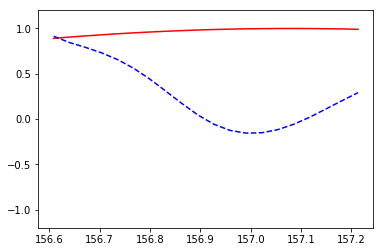

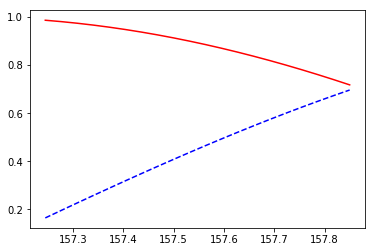

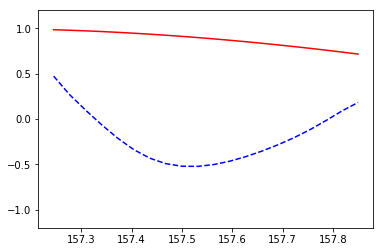

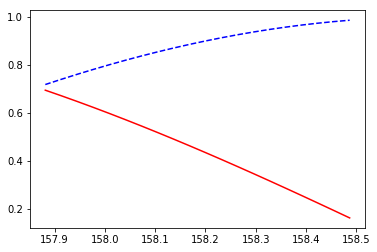

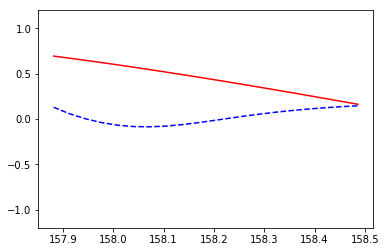

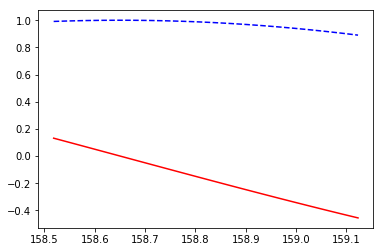

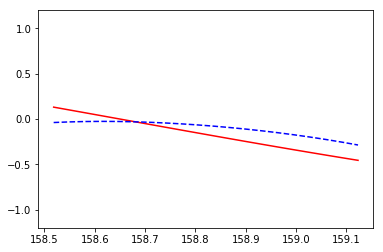

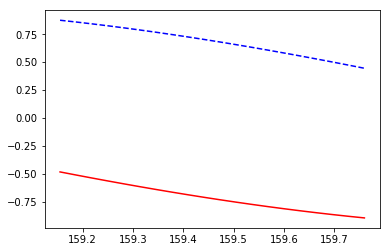

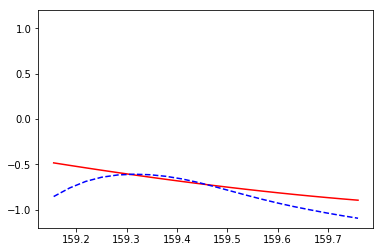

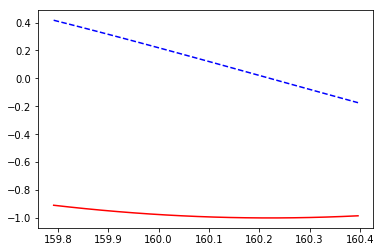

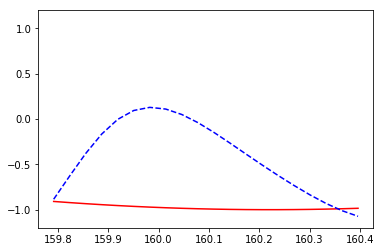

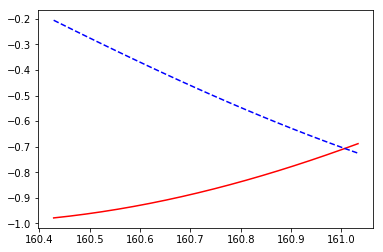

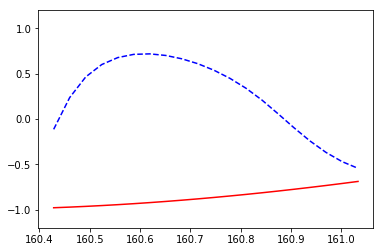

train cost:  0.09048054


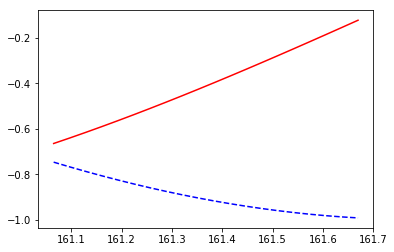

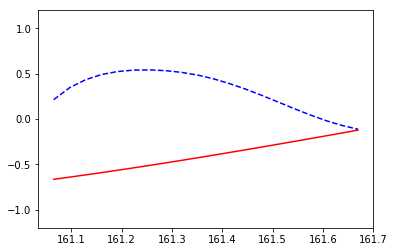

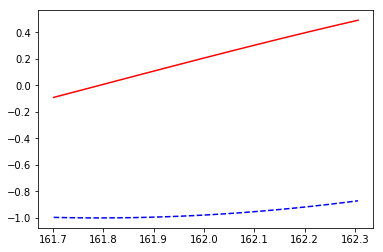

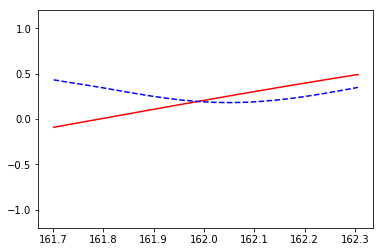

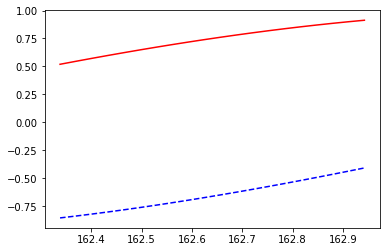

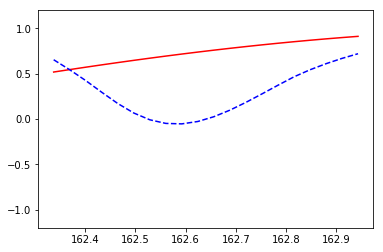

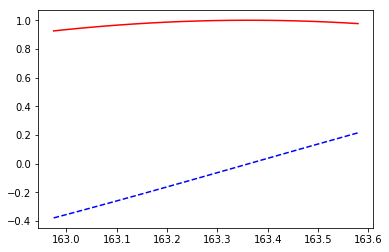

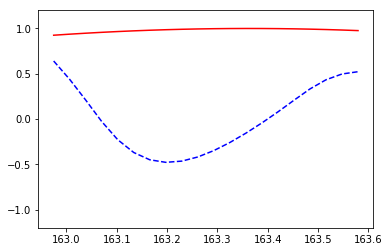

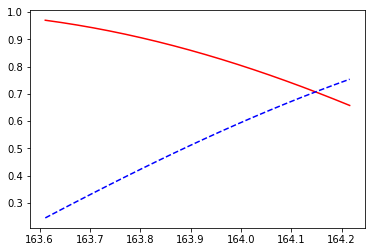

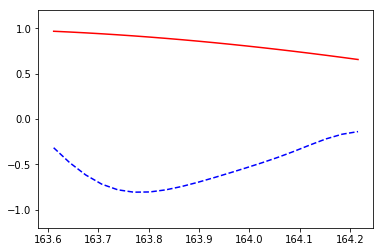

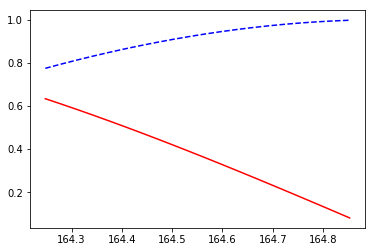

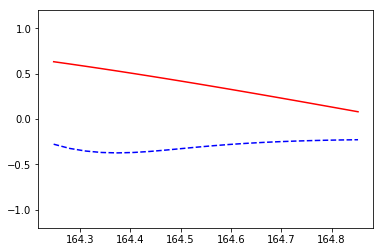

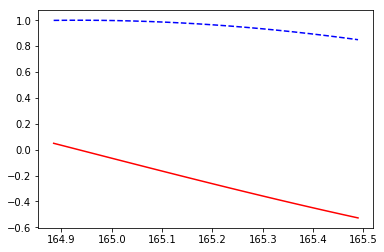

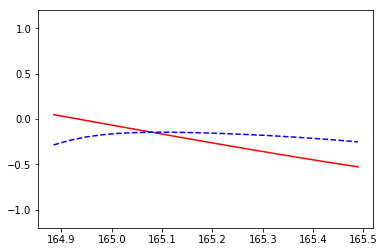

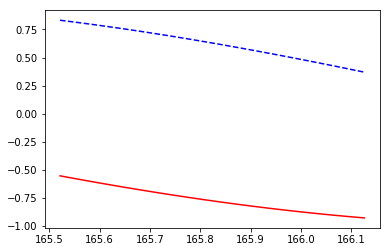

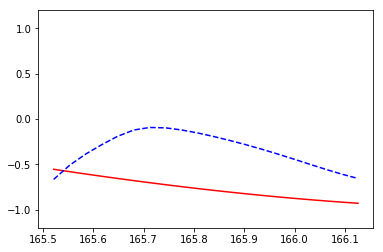

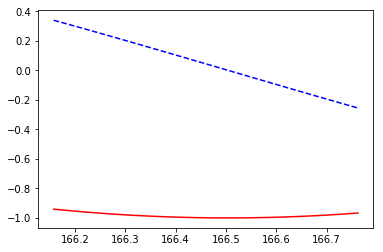

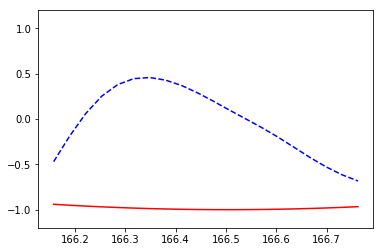

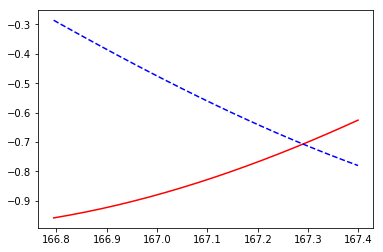

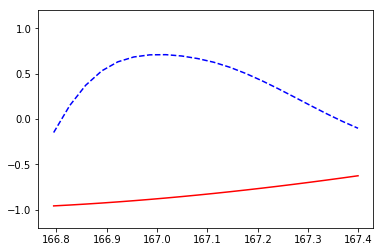

train cost:  0.067083575


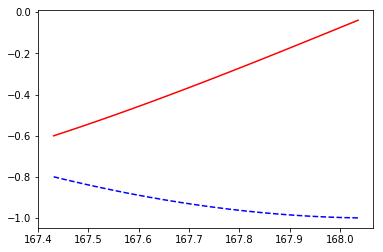

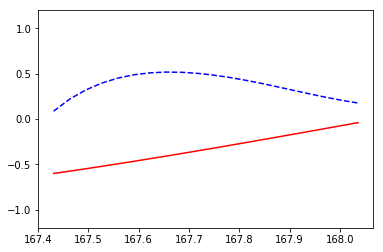

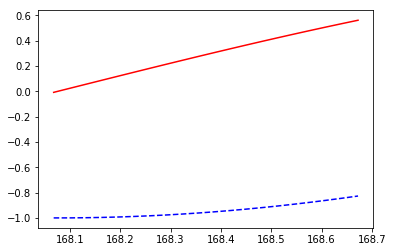

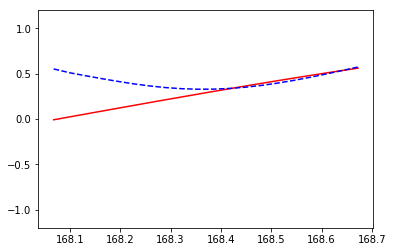

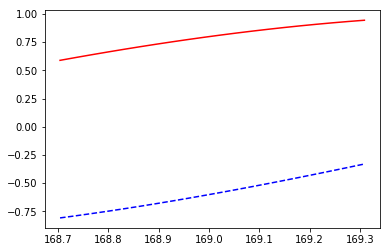

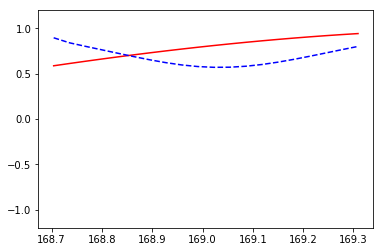

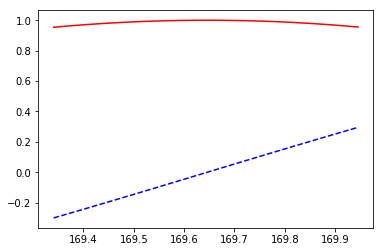

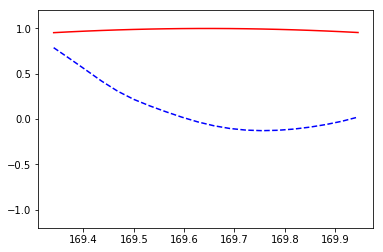

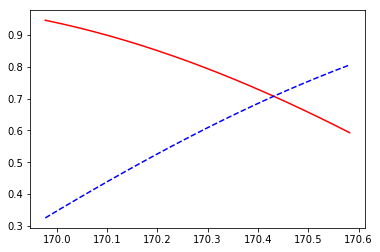

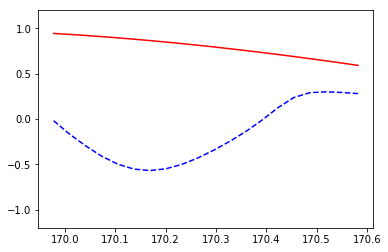

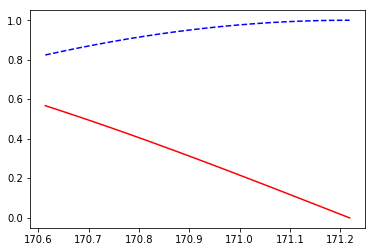

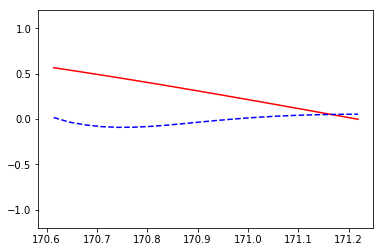

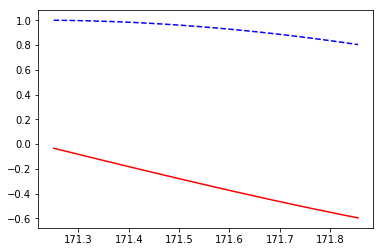

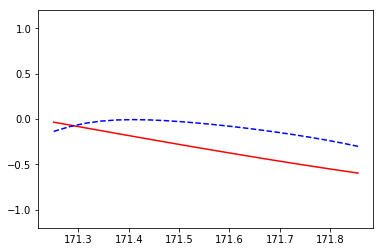

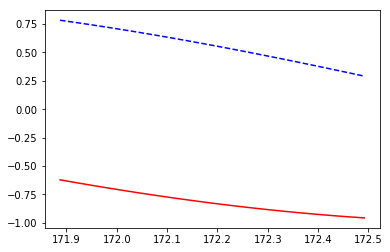

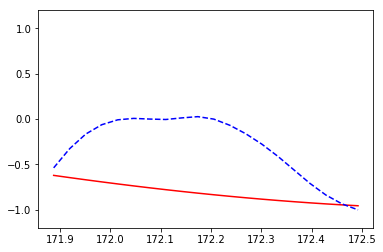

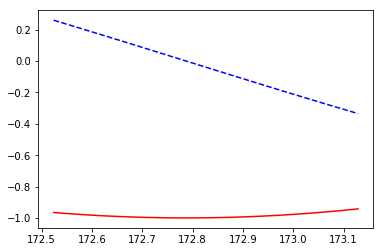

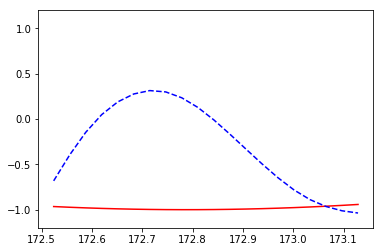

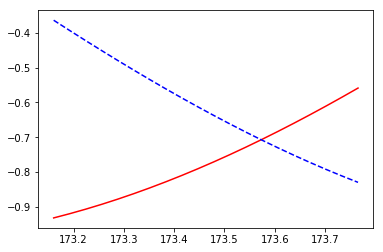

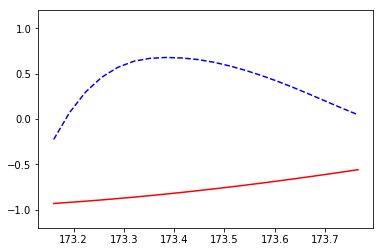

train cost:  0.08374398


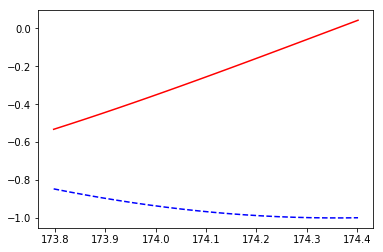

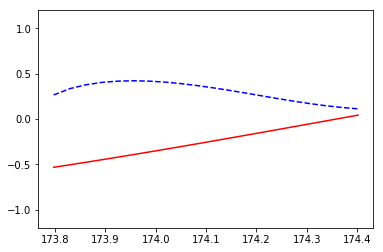

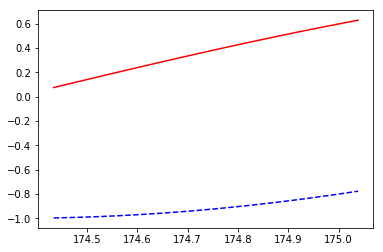

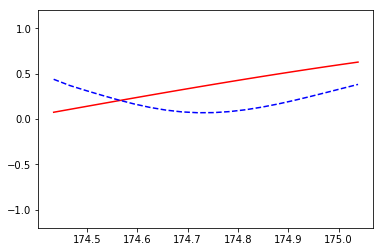

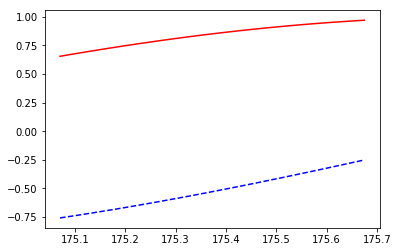

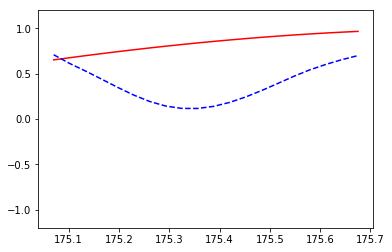

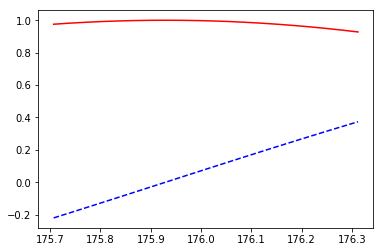

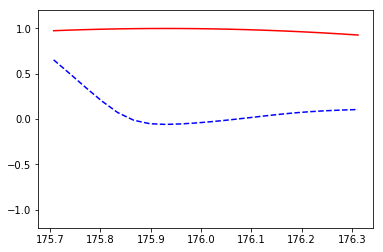

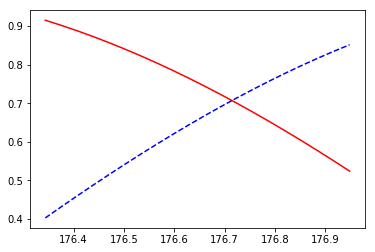

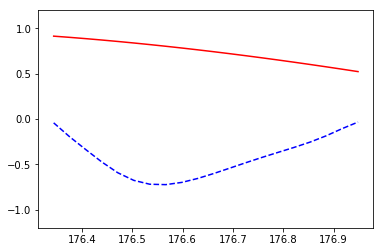

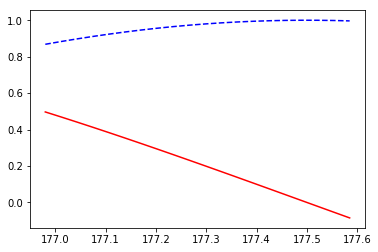

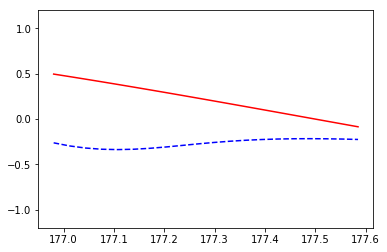

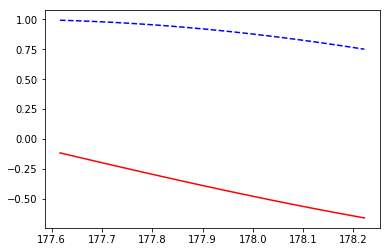

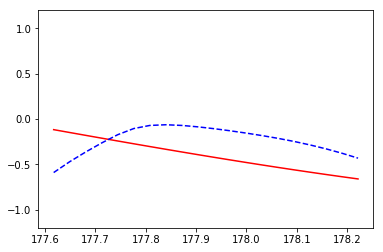

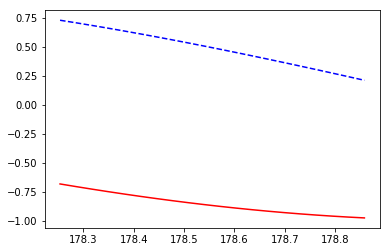

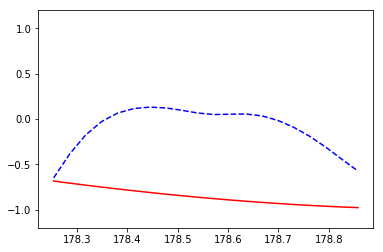

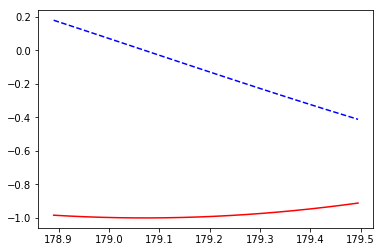

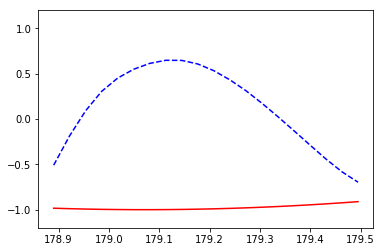

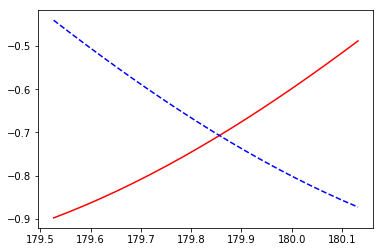

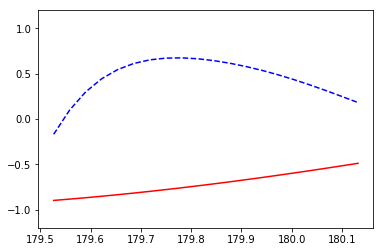

train cost:  0.043024883


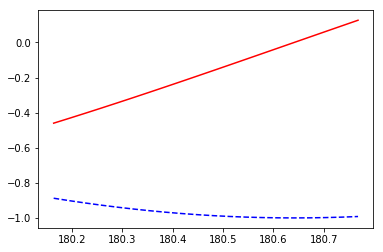

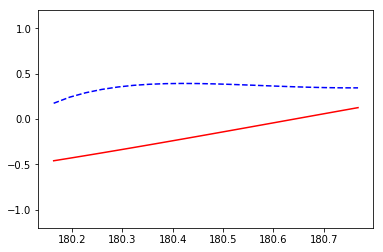

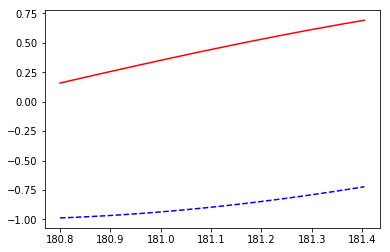

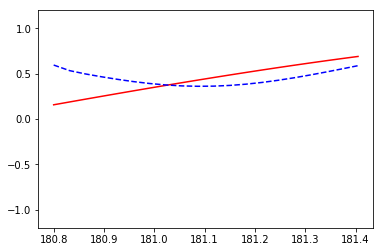

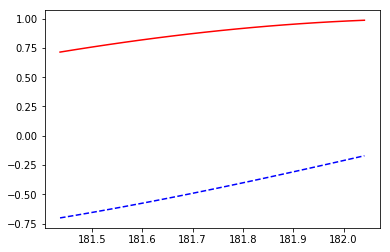

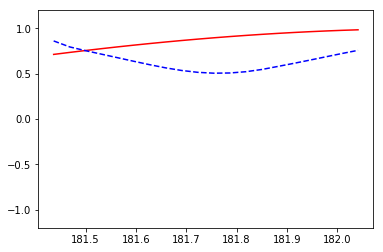

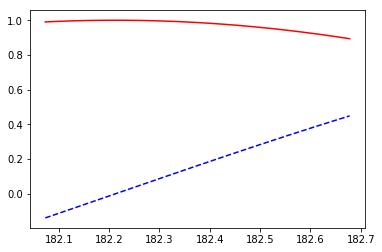

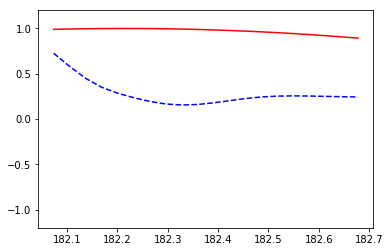

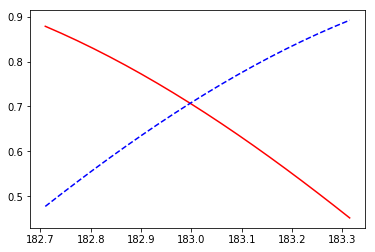

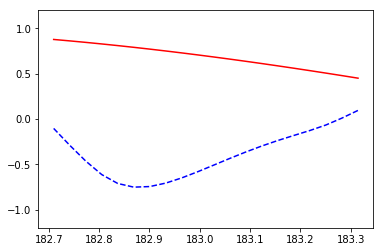

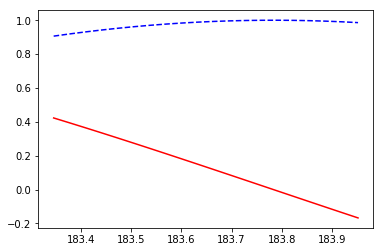

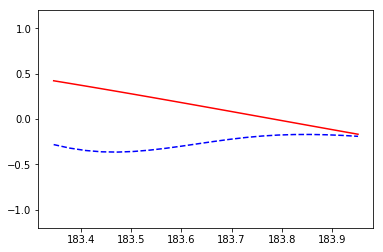

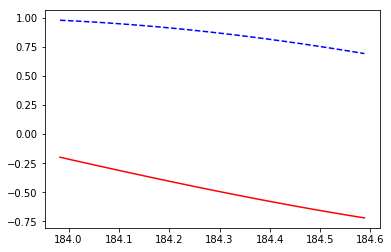

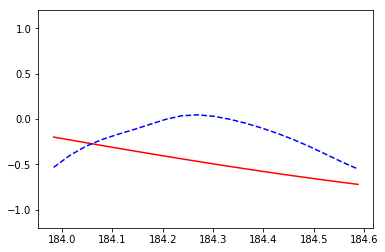

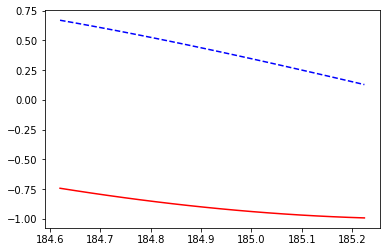

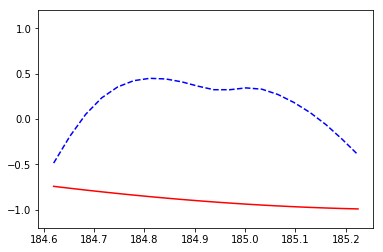

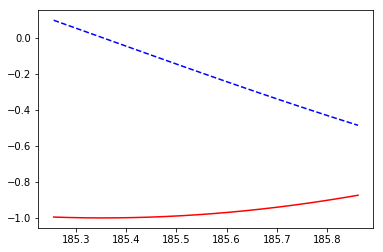

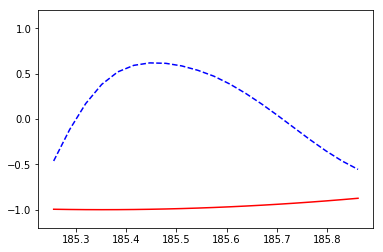

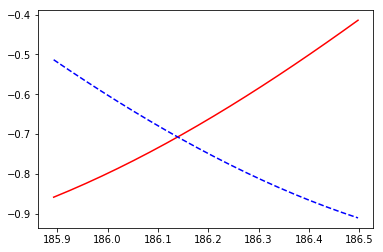

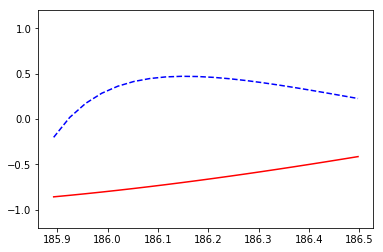

train cost:  0.017194767


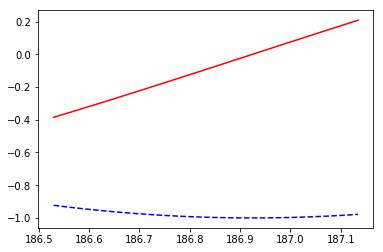

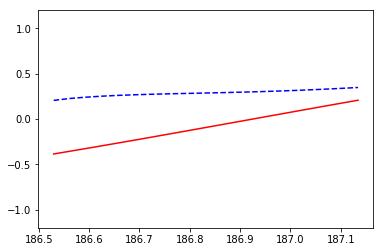

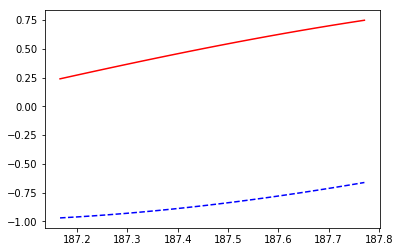

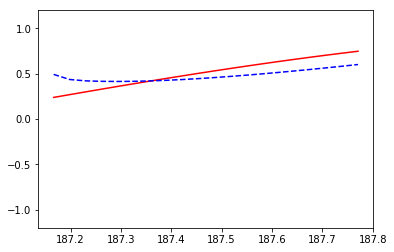

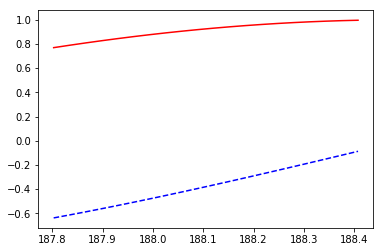

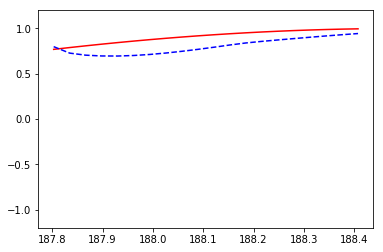

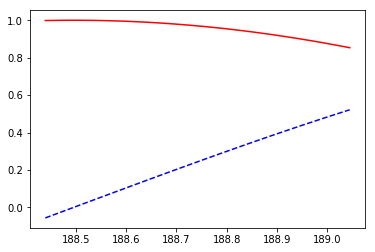

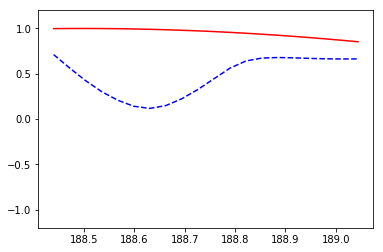

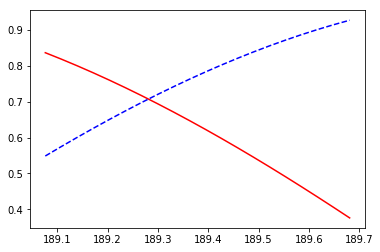

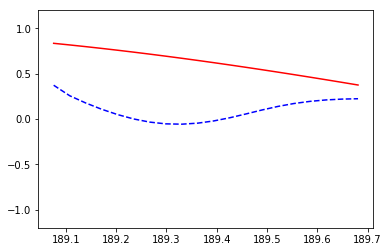

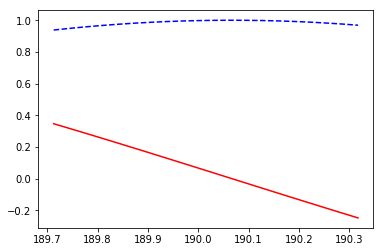

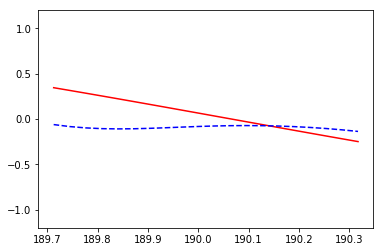

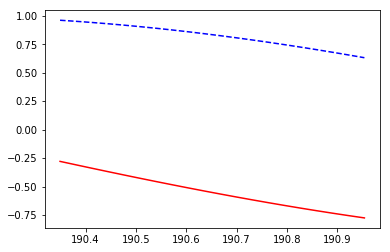

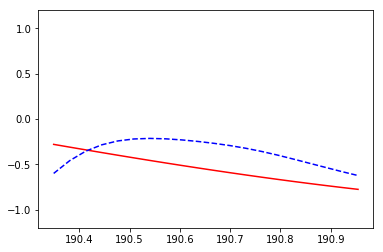

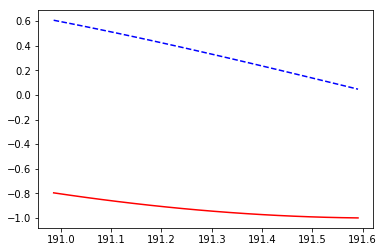

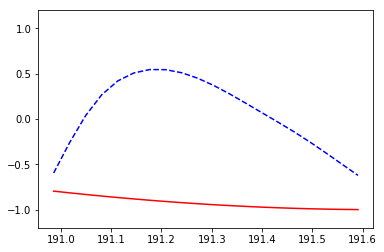

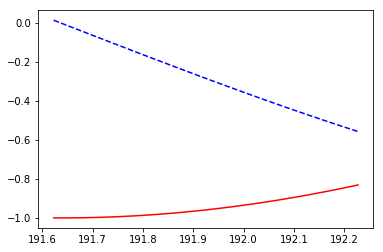

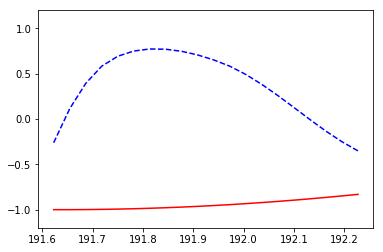

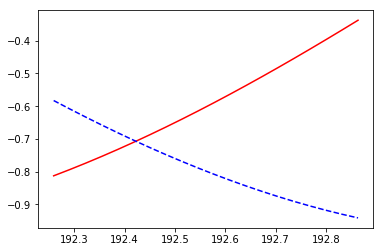

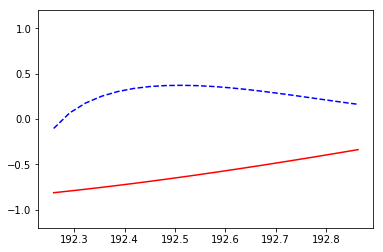

train cost:  0.020749219


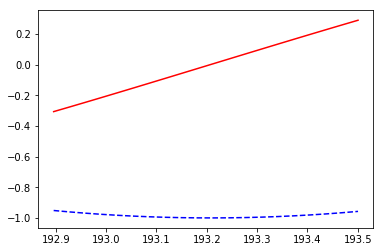

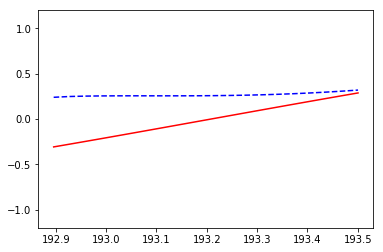

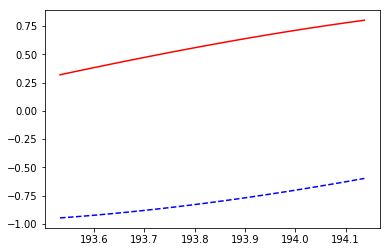

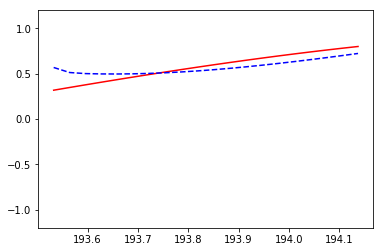

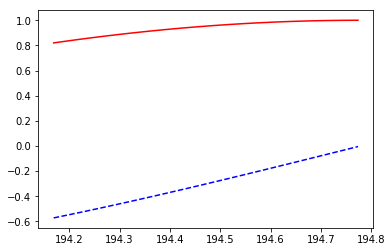

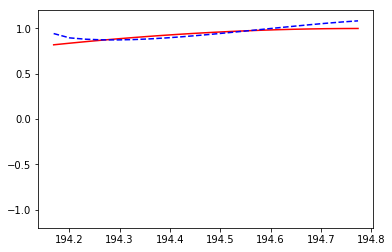

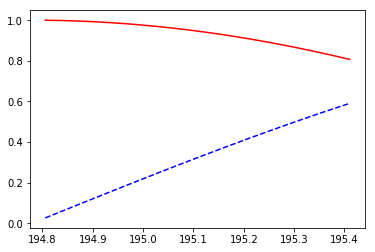

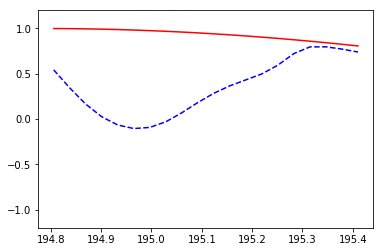

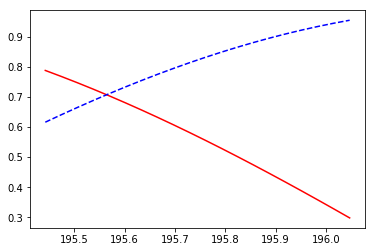

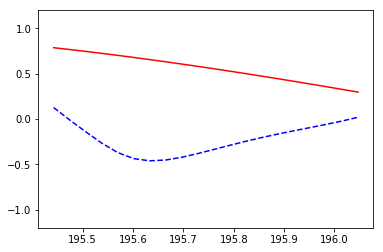

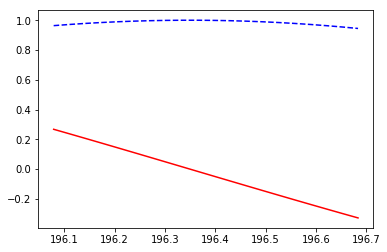

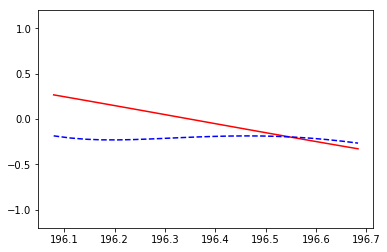

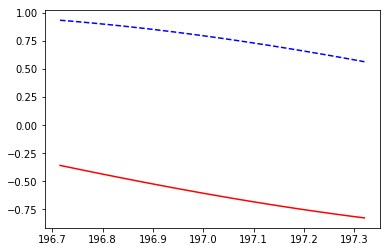

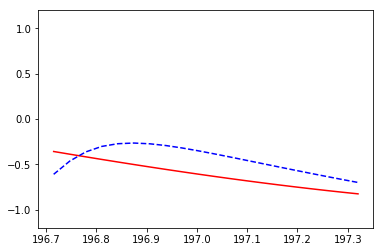

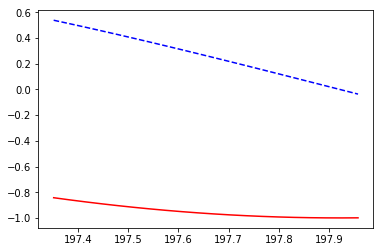

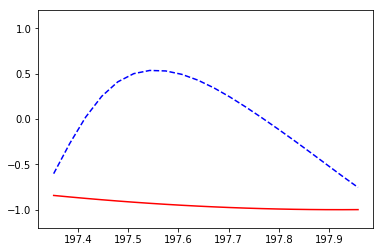

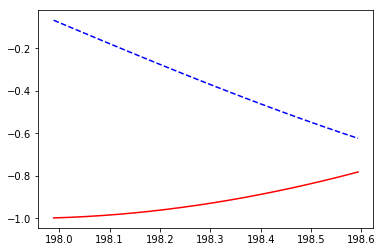

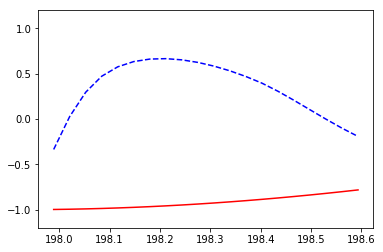

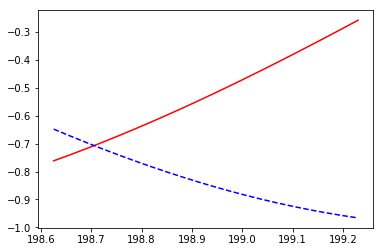

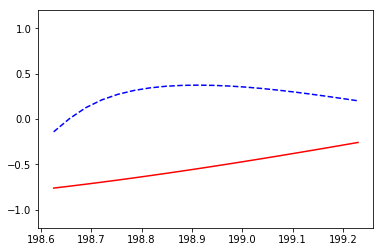

train cost:  0.02540211


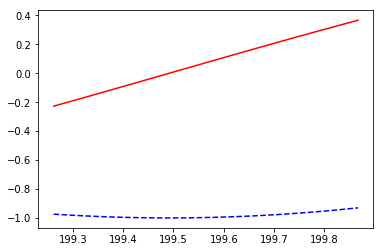

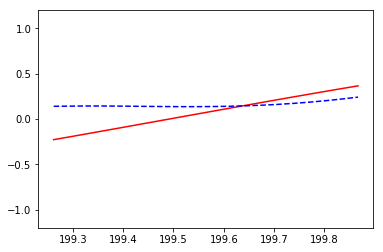

In [ ]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)